In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn import metrics

matplotlib.style.use('ggplot')

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
os.getcwd()

'C:\\Users\\farah\\Documents\\General Assembly DSI\\DSI-508\\Projects\\project-5\\project-5data'

In [3]:
df = pd.read_csv('../group-project/clean-data/combined.csv')
df['fips'] = df.fips.astype('object')

In [4]:
df.head()

,state,countyname,fips,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,...,flag_net,flag_hi,flag_hx,flag_wbgt,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,ME,Washington,23029,-67.6361,45.0363,31.625,9.446,1.900,11.346,1.38,...,0.0,0.0,0.0,0.0,86.78,13.22,0.00,0.0,0.0,0.0
1,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.000,10.497,1.04,...,0.0,0.0,0.0,0.0,75.07,24.93,2.25,0.0,0.0,0.0
2,GA,Liberty,13179,-81.2103,31.7093,62.467,51.264,0.000,51.264,6.42,...,0.0,0.0,0.0,0.0,84.02,15.98,0.21,0.0,0.0,0.0
3,CT,Hartford,9003,-72.7328,41.8064,895.841,78.563,671.826,750.389,12.78,...,0.0,0.0,0.0,0.0,39.70,60.30,30.55,0.0,0.0,0.0
4,CT,Tolland,9013,-72.3365,41.8550,151.420,45.125,46.224,91.349,3.29,...,0.0,0.0,0.0,0.0,40.99,59.01,29.40,0.0,0.0,0.0


In [5]:
df.dtypes

state                   object
countyname              object
fips                    object
lon                    float64
lat                    float64
                        ...   
abnormally_dry         float64
moderate_drought       float64
severe_drought         float64
extreme_drought        float64
exceptional_drought    float64
Length: 85, dtype: object

In [6]:
df.head()

,state,countyname,fips,lon,lat,tp_totpop,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,...,flag_net,flag_hi,flag_hx,flag_wbgt,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,ME,Washington,23029,-67.6361,45.0363,31.625,9.446,1.900,11.346,1.38,...,0.0,0.0,0.0,0.0,86.78,13.22,0.00,0.0,0.0,0.0
1,GA,McIntosh,13191,-81.2646,31.5329,13.969,10.497,0.000,10.497,1.04,...,0.0,0.0,0.0,0.0,75.07,24.93,2.25,0.0,0.0,0.0
2,GA,Liberty,13179,-81.2103,31.7093,62.467,51.264,0.000,51.264,6.42,...,0.0,0.0,0.0,0.0,84.02,15.98,0.21,0.0,0.0,0.0
3,CT,Hartford,9003,-72.7328,41.8064,895.841,78.563,671.826,750.389,12.78,...,0.0,0.0,0.0,0.0,39.70,60.30,30.55,0.0,0.0,0.0
4,CT,Tolland,9013,-72.3365,41.8550,151.420,45.125,46.224,91.349,3.29,...,0.0,0.0,0.0,0.0,40.99,59.01,29.40,0.0,0.0,0.0


# Water Withdrawn From Public Supply

In [7]:
df1 = df.filter(items=['ps_wtotl', 'do_psdel', 'state', 'fips'])
df1.head()

,ps_wtotl,do_psdel,state,fips
0,1.57,0.58,ME,23029
1,1.04,0.94,GA,13191
2,6.42,3.18,GA,13179
3,59.22,25.29,CT,9003
4,4.93,3.83,CT,9013


In [8]:
df1.shape

(3196, 4)

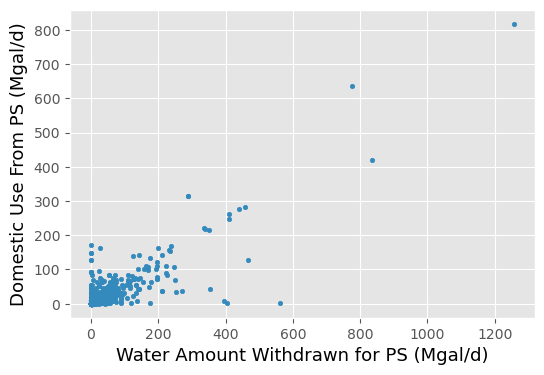

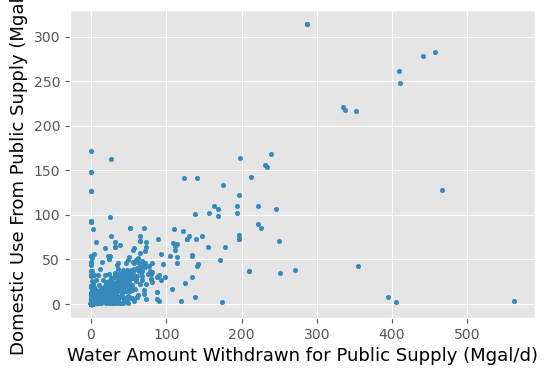

In [9]:
df.plot(kind="scatter", x="ps_wtotl", y="do_psdel", figsize=(6,4), s=10)
plt.xlabel("Water Amount Withdrawn for PS (Mgal/d)", fontsize=13)
plt.ylabel("Domestic Use From PS (Mgal/d)", fontsize=13);

#remove outliers for better visual
df1_chk = df1[df1.ps_wtotl < 600]
df1_chk.plot(kind="scatter", x="ps_wtotl", y="do_psdel", figsize=(6,4), s=10)
plt.xlabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=13)
plt.ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=13);

## KMeans

In [10]:
# Define X
#X = df1[['ps_gwpop', 'ps_swpop', 'ps_topop']]

# Scale data
#sc = StandardScaler()
#X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
#km1 = KMeans(n_clusters=2, random_state=42)
#km1.fit(X_scaled)

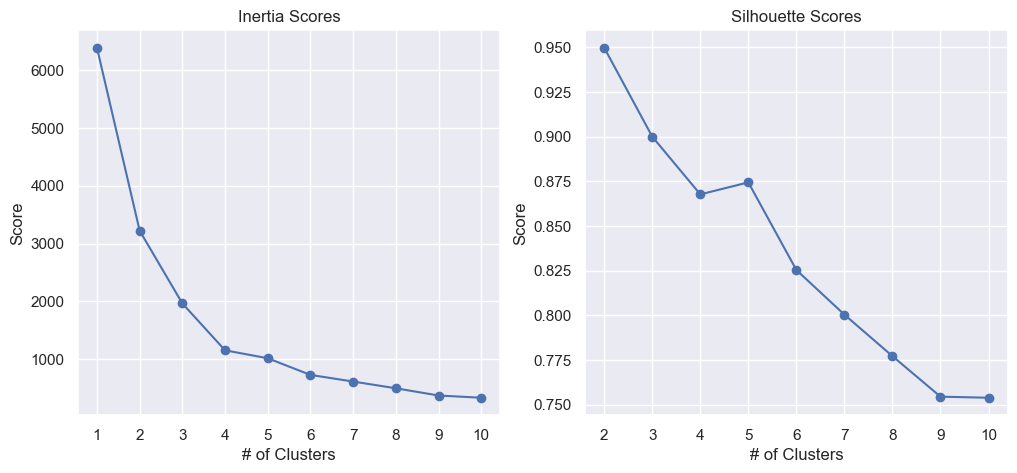

In [11]:
# Define X
#X = df1[['ps_wtotl', 'do_psdel', 'state', 'fips']]
#X = pd.get_dummies(X, columns = ['state', 'fips'], drop_first=True)
X = df1[['ps_wtotl', 'do_psdel']]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

In [12]:
# Fit a K-means clustering model
km1 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km1.fit(Z)

KMeans(n_clusters=4, n_init='auto', random_state=42)

In [13]:
df1['cluster'] = km1.labels_
df1.head()

,ps_wtotl,do_psdel,state,fips,cluster
0,1.57,0.58,ME,23029,0
1,1.04,0.94,GA,13191,0
2,6.42,3.18,GA,13179,0
3,59.22,25.29,CT,9003,2
4,4.93,3.83,CT,9013,0


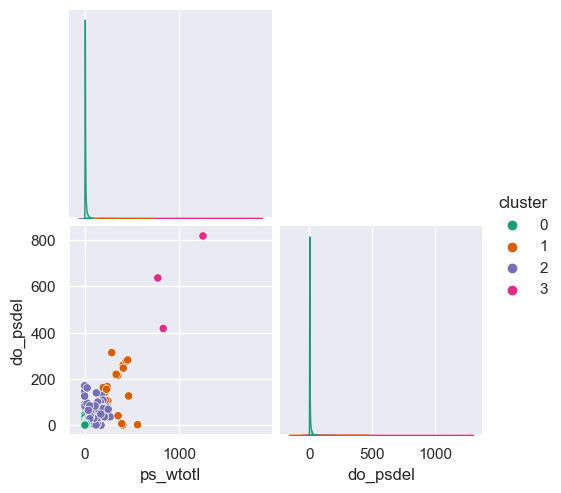

In [14]:
sns.pairplot(data = df1,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = ['ps_wtotl', 'do_psdel'],
             y_vars = ['ps_wtotl', 'do_psdel'],
             hue = 'cluster');


<Figure size 600x400 with 0 Axes>

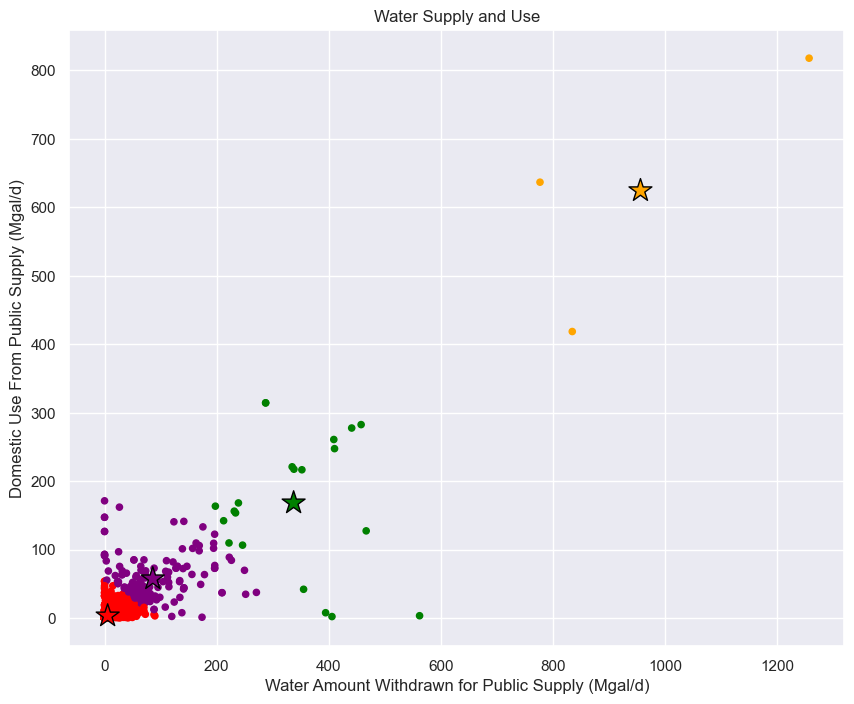

In [15]:
centroids = sc.inverse_transform(km1.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=['ps_wtotl', 'do_psdel']
)

plt.figure(figsize=(6, 4))

colors = ["red", "green", "purple", "orange"]
df1['color'] = df1['cluster'].map(lambda p: colors[p])

# Plot points
ax = df1.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    figsize=(10, 8),
    c=df1['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ps_wtotl",
    y="do_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax
)

# Labels
plt.title('Water Supply and Use')
plt.xlabel('Water Amount Withdrawn for Public Supply (Mgal/d)')
plt.ylabel('Domestic Use From Public Supply (Mgal/d)')

# Show the plot
plt.show();

# Self Supplied Industrial Withdrawal

In [16]:
keep = ['to_wtotl', 'in_wtotl']
df2 = df.filter(items=keep)
df2.head()

,to_wtotl,in_wtotl
0,47.75,27.37
1,1.48,0.02
2,18.46,11.06
3,260.45,106.27
4,9.67,1.00


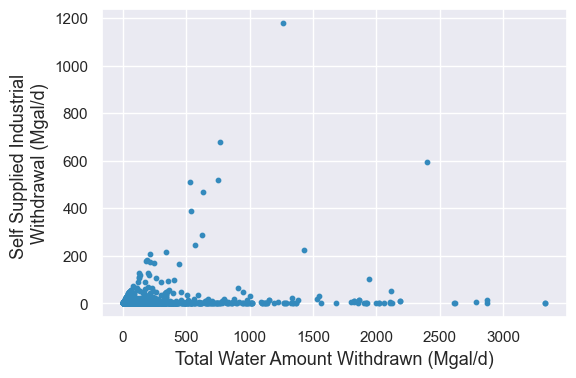

In [17]:
df2 = df.filter(items=keep)

df2.plot(kind="scatter", x="to_wtotl", y="in_wtotl", figsize=(6,4), s=10)
plt.xlabel("Total Water Amount Withdrawn (Mgal/d)", fontsize=13)
plt.ylabel("Self Supplied Industrial \nWithdrawal (Mgal/d)", fontsize=13);

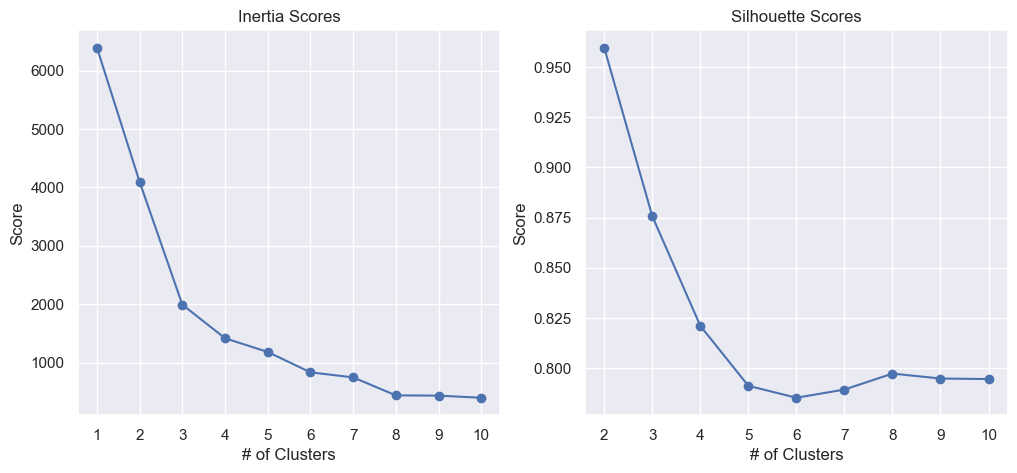

In [18]:
# Define X
#X = df1[['ps_wtotl', 'do_psdel', 'state', 'fips']]
#X = pd.get_dummies(X, columns = ['state', 'fips'], drop_first=True)
X = df2[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

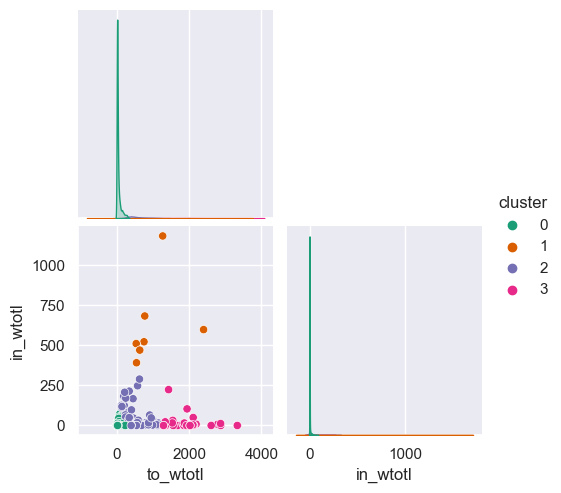

In [19]:
km2 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km2.fit(Z)

df2['cluster'] = km2.labels_
df2.head()

sns.pairplot(data = df2,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');


<Figure size 600x400 with 0 Axes>

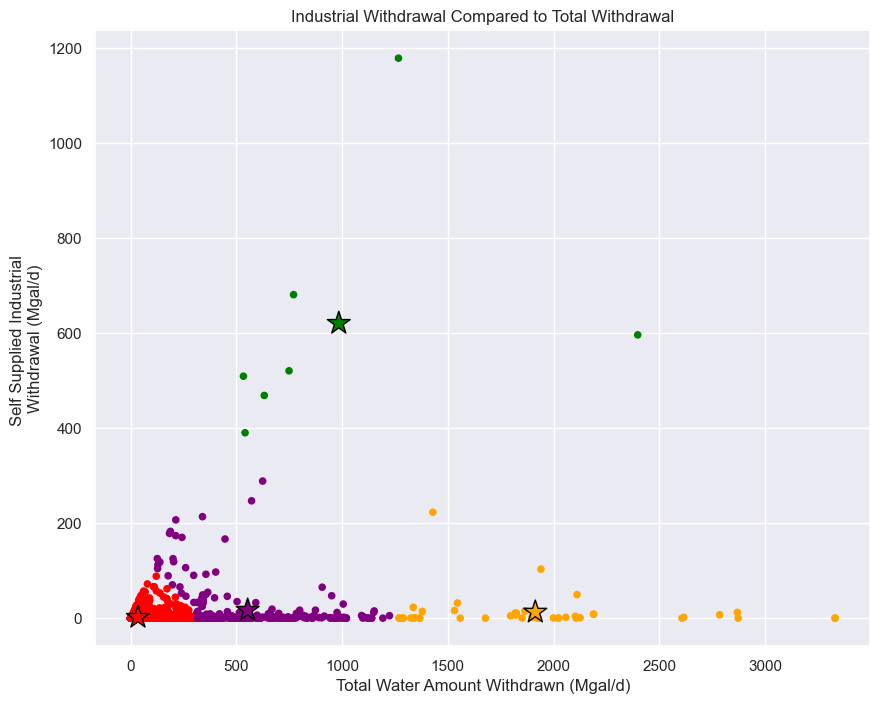

In [20]:
centroids = sc.inverse_transform(km2.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

plt.figure(figsize=(6, 4))

colors = ["red", "green", "purple", "orange"]
df2['color'] = df2['cluster'].map(lambda p: colors[p])

# Plot points
ax = df2.plot(
    kind="scatter",
    x="to_wtotl",
    y="in_wtotl",
    figsize=(10, 8),
    c=df2['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="in_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax
)

# Labels
plt.title('Industrial Withdrawal Compared to Total Withdrawal')
plt.xlabel('Total Water Amount Withdrawn (Mgal/d)')
plt.ylabel('Self Supplied Industrial \nWithdrawal (Mgal/d)')

# Show the plot
plt.show();

# Irrigation Withdrawal and Reclaimed Wastewaster

In [21]:
keep = ['ir_wfrto', 'ir_recww', 'ic_wfrto', 'ic_recww', 'ig_wfrto', 'ig_recww',  ]
df3 = df.filter(items=keep)
df3.head()

,ir_wfrto,ir_recww,ic_wfrto,ic_recww,ig_wfrto,ig_recww
0,7.37,0.0,7.34,0.0,0.03,0.0
1,0.16,0.0,0.00,0.0,0.16,0.0
2,0.00,0.0,0.00,0.0,0.00,0.0
3,4.09,0.0,2.41,0.0,1.68,0.0
4,0.50,0.0,0.23,0.0,0.27,0.0


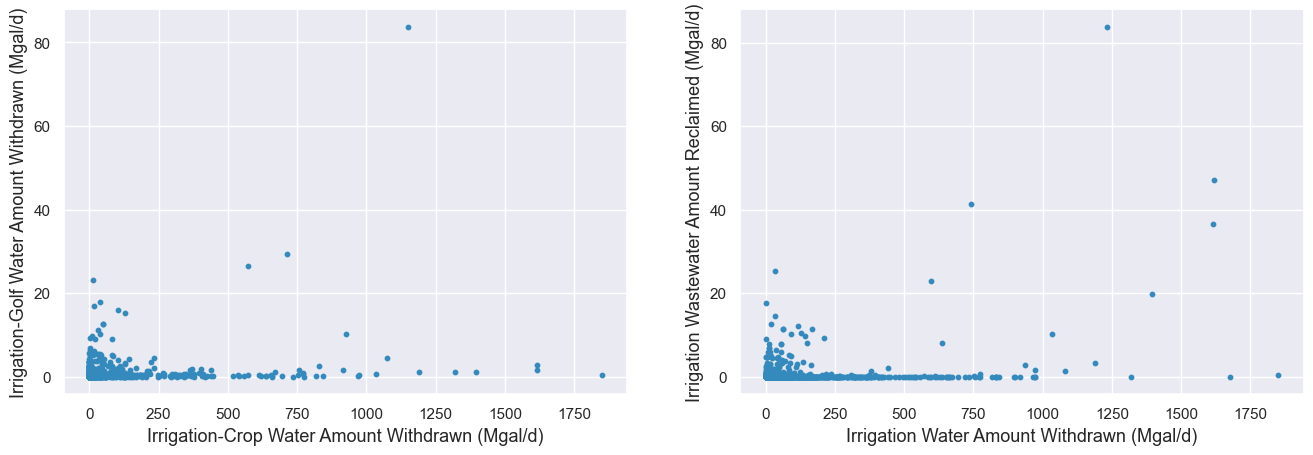

In [22]:
df3 = df.filter(items=keep)

fig, ax = plt.subplots(1,2, figsize=(10,6))
df3.plot(kind="scatter", x="ic_wfrto", y="ig_wfrto", figsize=(16,5), s=10, ax=ax[0])
ax[0].set_xlabel("Irrigation-Crop Water Amount Withdrawn (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Irrigation-Golf Water Amount Withdrawn (Mgal/d)", fontsize=13);

df3.plot(kind="scatter", x="ir_wfrto", y="ir_recww", figsize=(16,5), s=10, ax=ax[1])
ax[1].set_xlabel("Irrigation Water Amount Withdrawn (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Irrigation Wastewater Amount Reclaimed (Mgal/d)", fontsize=13);

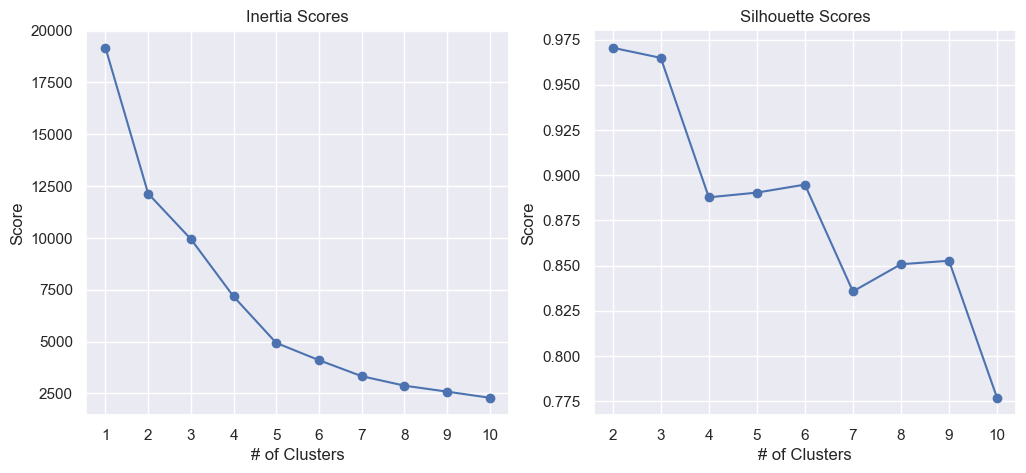

In [23]:
# Define X
X = df3[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

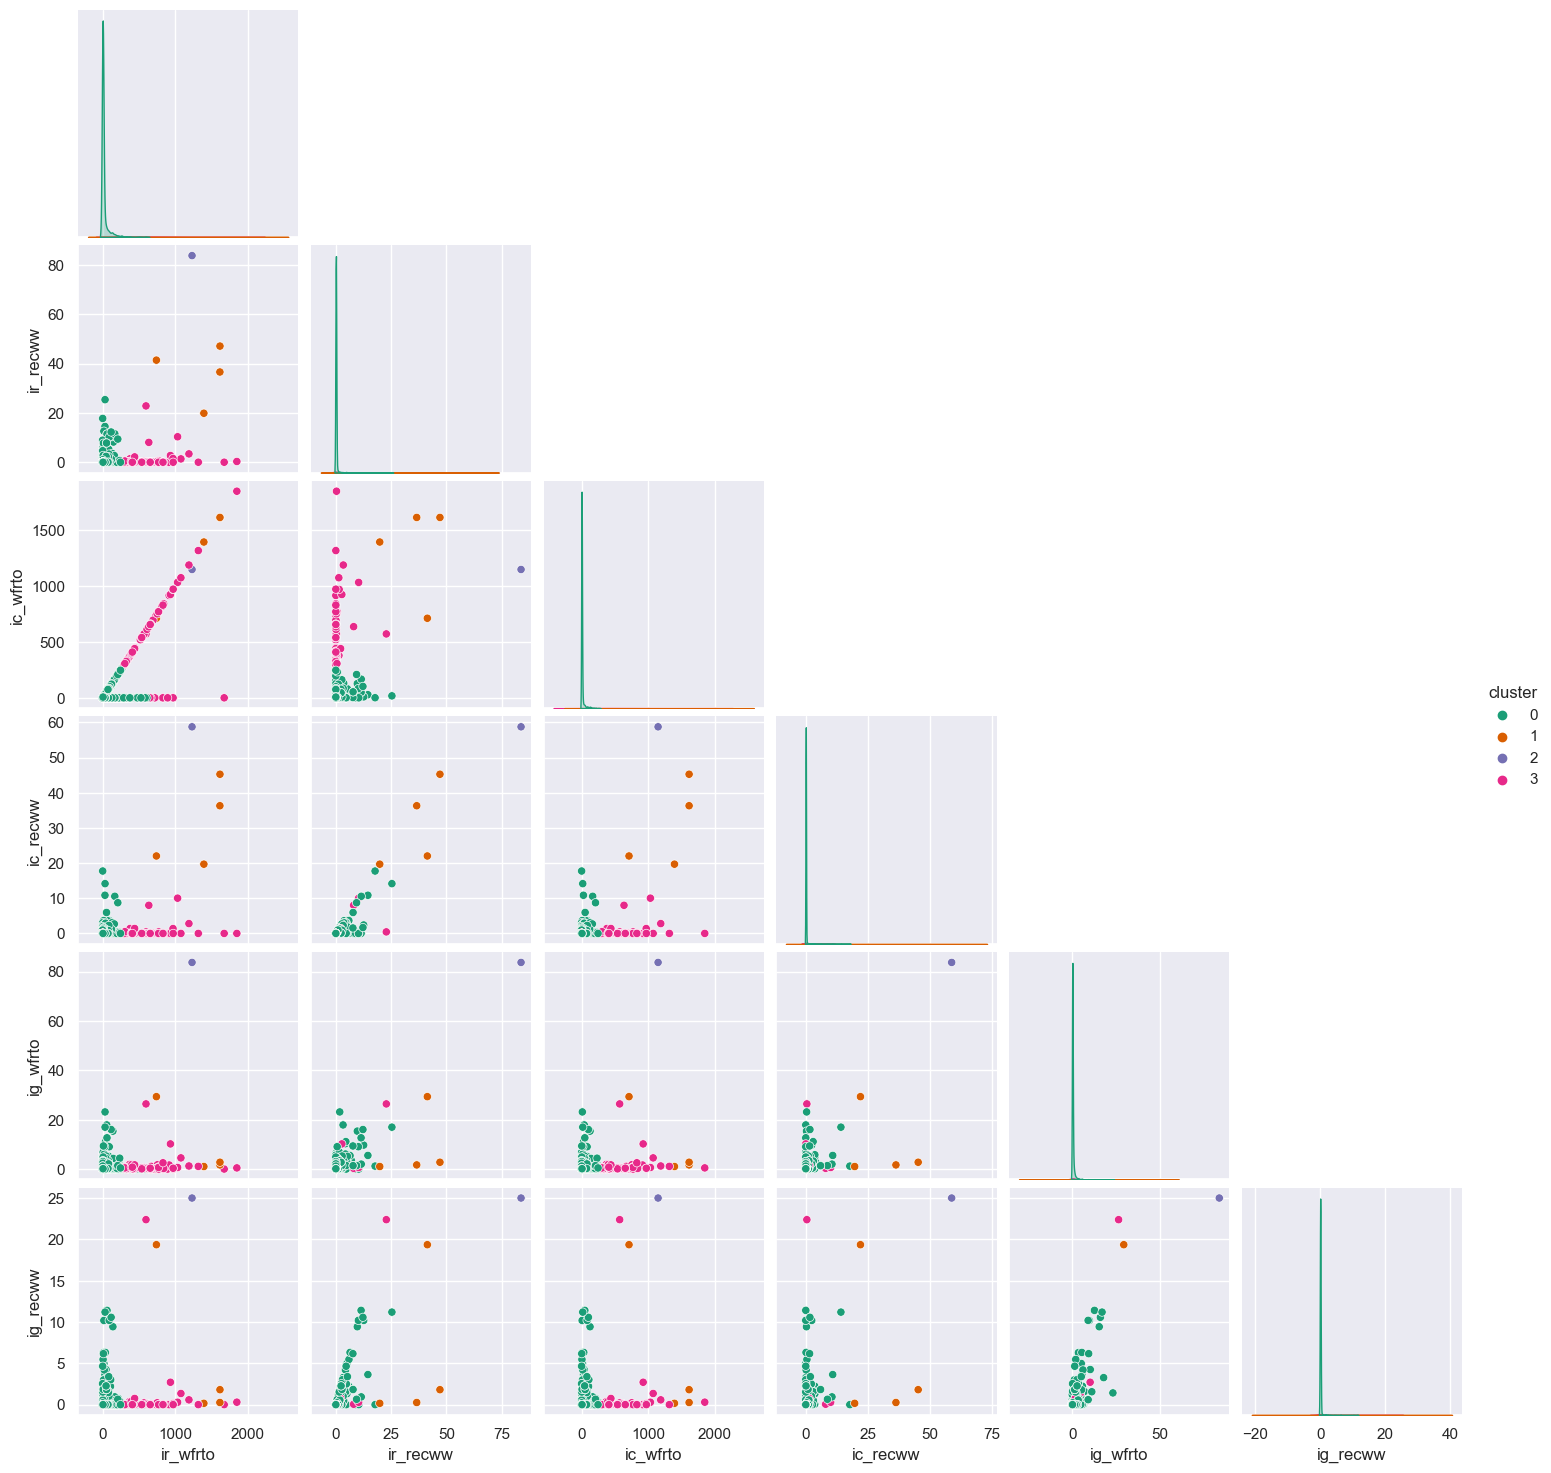

In [24]:
km3 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km3.fit(Z)

df3['cluster'] = km3.labels_
df3.head()

sns.pairplot(data = df3,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

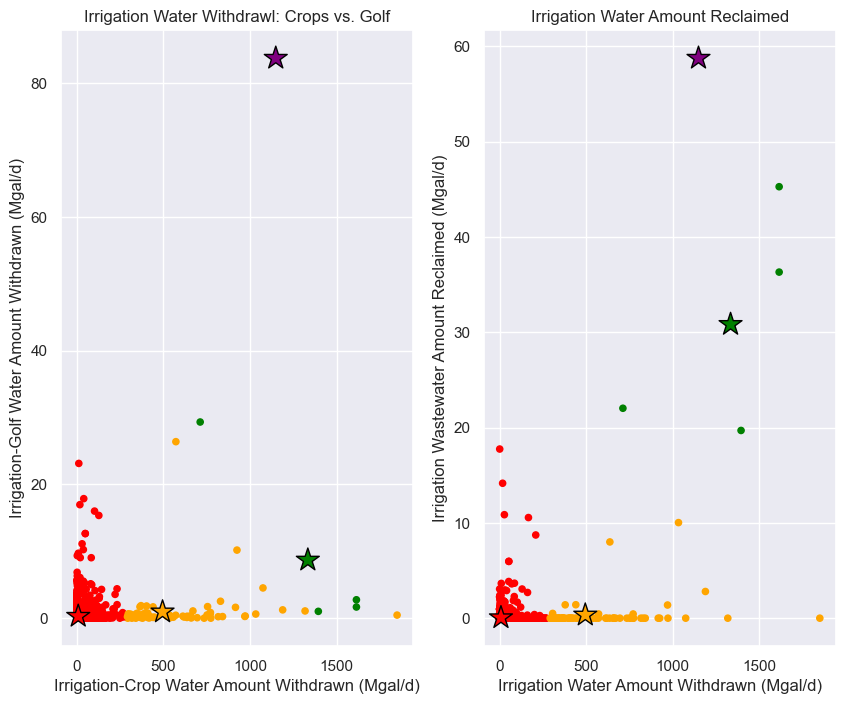

In [25]:
centroids = sc.inverse_transform(km3.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(1,2, figsize=(16, 6))

colors = ["red", "green", 'purple', 'orange']
df3['color'] = df3['cluster'].map(lambda p: colors[p])

# Plot points
df3.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ig_wfrto",
    figsize=(10, 8),
    c=df3['color'],
    ax=ax[0]
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ig_wfrto",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0]
)

# Labels
ax[0].set_title('Irrigation Water Withdrawl: Crops vs. Golf')
ax[0].set_xlabel('Irrigation-Crop Water Amount Withdrawn (Mgal/d)')
ax[0].set_ylabel('Irrigation-Golf Water Amount Withdrawn (Mgal/d)')



# Plot points
df3.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ic_recww",
    figsize=(10, 8),
    c=df3['color'],
    ax=ax[1]
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ic_wfrto",
    y="ic_recww",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1]
)

# Labels
ax[1].set_title('Irrigation Water Amount Reclaimed')
ax[1].set_xlabel('Irrigation Water Amount Withdrawn (Mgal/d)')
ax[1].set_ylabel('Irrigation Wastewater Amount Reclaimed (Mgal/d)')

# Show the plot
plt.show();

# Thermoelectric Withdrawal

In [26]:
keep = ['po_wtotl', 'pc_wtotl', 
        'po_psdel', 'pc_psdel', 
        'pt_wtotl', 'pt_recww', 
                    'pt_psdel', 
        'po_recww', 'pc_recww'
       ]
df4 = df.filter(items=keep)
df4.head()

,po_wtotl,pc_wtotl,po_psdel,pc_psdel,pt_wtotl,pt_recww,pt_psdel,po_recww,pc_recww
0,0.00,0.35,0.0,0.00,0.35,0.0,0.00,0.0,0.0
1,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0
2,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0
3,71.56,0.00,0.0,0.43,71.56,0.0,0.43,0.0,0.0
4,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0


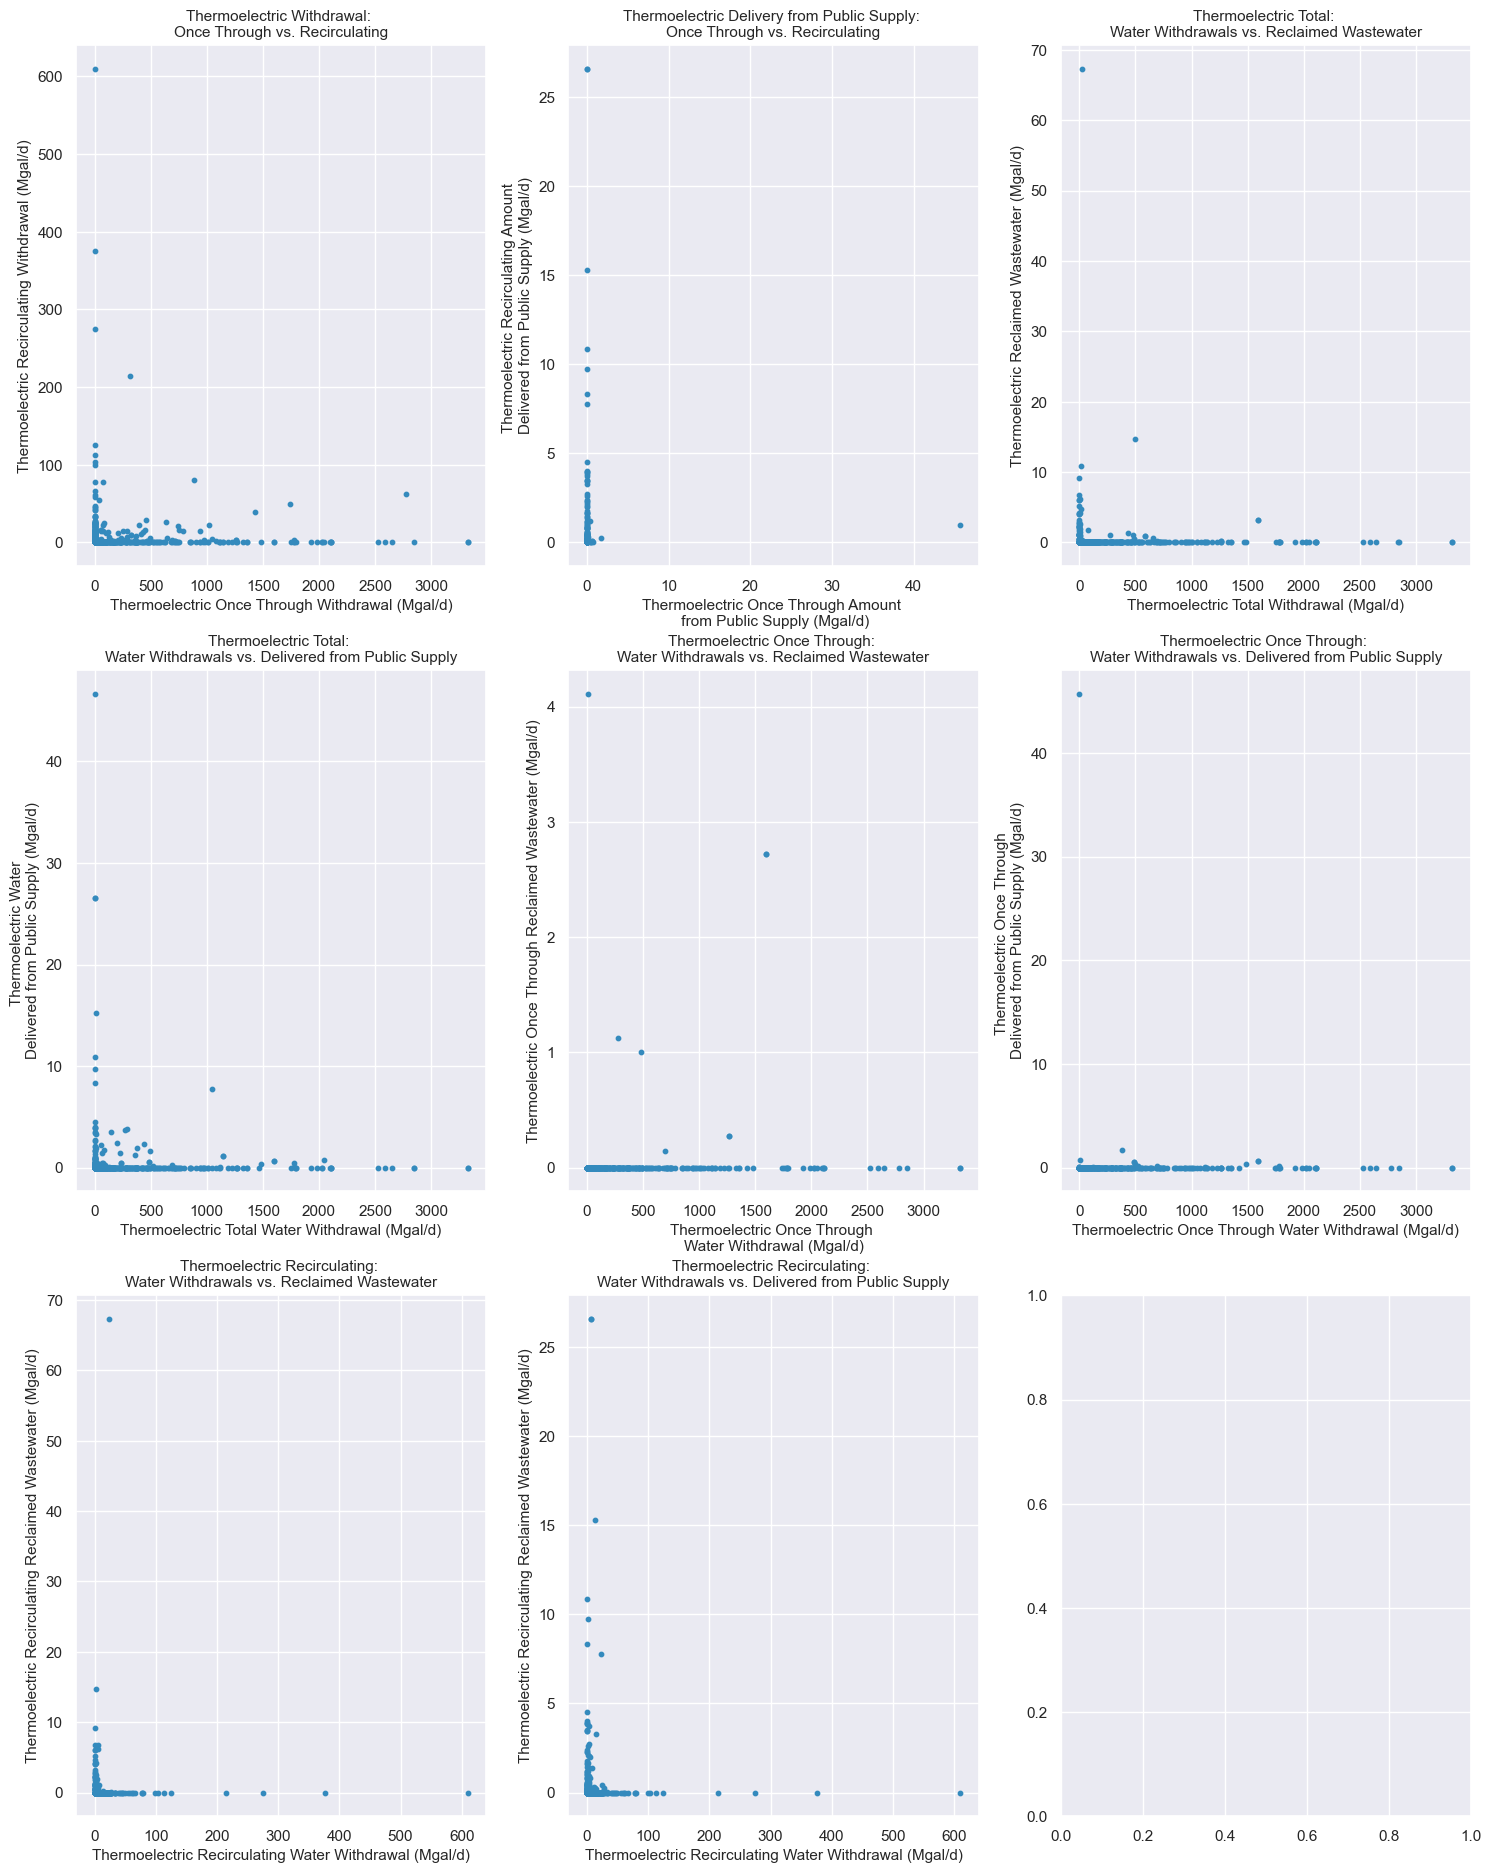

In [27]:
df4 = df.filter(items=keep)

fig, ax = plt.subplots(3,3)
f = 11
fg = (18,23)

# 4a - Thermo Once Thru vs. Thermo Recirculating Withdrawal
df4.plot(kind="scatter", x="po_wtotl", y="pc_wtotl", figsize=fg, s=10, ax=ax[0,0])
ax[0,0].set_title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=f);
ax[0,0].set_xlabel("Thermoelectric Once Through Withdrawal (Mgal/d)", fontsize=f)
ax[0,0].set_ylabel("Thermoelectric Recirculating Withdrawal (Mgal/d)", fontsize=f);
ax[0,0].tick_params(axis='x', labelsize=f)
ax[0,0].tick_params(axis='y', labelsize=f)

# 4b - Thermo Once Thru vs. Thermo Recirculating Delivered from Public Supply
df4.plot(kind="scatter", x="po_psdel", y="pc_psdel", figsize=fg, s=10, ax=ax[0,1])
ax[0,1].set_title("Thermoelectric Delivery from Public Supply: \nOnce Through vs. Recirculating", fontsize=f)
ax[0,1].set_xlabel("Thermoelectric Once Through Amount \n from Public Supply (Mgal/d)", fontsize=f)
ax[0,1].set_ylabel("Thermoelectric Recirculating Amount \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[0,1].tick_params(axis='x', labelsize=f)
ax[0,1].tick_params(axis='y', labelsize=f)

# 4c - Thermo Total Withdrawal vs. Reclaimed Wastewater
df4.plot(kind="scatter", x="pt_wtotl", y="pt_recww", figsize=fg, s=10, ax=ax[0,2])
ax[0,2].set_title("Thermoelectric Total: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[0,2].set_xlabel("Thermoelectric Total Withdrawal (Mgal/d)", fontsize=f)
ax[0,2].set_ylabel("Thermoelectric Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[0,2].tick_params(axis='x', labelsize=f)
ax[0,2].tick_params(axis='y', labelsize=f)

# 4d - Thermo Total Withdrawal vs. Delivered from Public Supply
df4.plot(kind="scatter", x="pt_wtotl", y="pt_psdel", figsize=fg, s=10, ax=ax[1,0])
ax[1,0].set_title("Thermoelectric Total: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[1,0].set_xlabel("Thermoelectric Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[1,0].set_ylabel("Thermoelectric Water \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[1,0].tick_params(axis='x', labelsize=f)
ax[1,0].tick_params(axis='y', labelsize=f)

# 4e - 4c for Once Thru
df4.plot(kind="scatter", x="po_wtotl", y="po_recww", figsize=fg, s=10, ax=ax[1,1])
ax[1,1].set_title("Thermoelectric Once Through: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[1,1].set_xlabel("Thermoelectric Once Through \nWater Withdrawal (Mgal/d)", fontsize=f)
ax[1,1].set_ylabel("Thermoelectric Once Through Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[1,1].tick_params(axis='x', labelsize=f)
ax[1,1].tick_params(axis='y', labelsize=f)

# 4f - 4d for Once Thru
df4.plot(kind="scatter", x="po_wtotl", y="po_psdel", figsize=fg, s=10, ax=ax[1,2])
ax[1,2].set_title("Thermoelectric Once Through: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[1,2].set_xlabel("Thermoelectric Once Through Water Withdrawal (Mgal/d)", fontsize=f)
ax[1,2].set_ylabel("Thermoelectric Once Through \nDelivered from Public Supply (Mgal/d)", fontsize=f);
ax[1,2].tick_params(axis='x', labelsize=f)
ax[1,2].tick_params(axis='y', labelsize=f)

# 4g - 4c for Recirculating
df4.plot(kind="scatter", x="pc_wtotl", y="pc_recww", figsize=fg, s=10, ax=ax[2,0])
ax[2,0].set_title("Thermoelectric Recirculating: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=f)
ax[2,0].set_xlabel("Thermoelectric Recirculating Water Withdrawal (Mgal/d)", fontsize=f)
ax[2,0].set_ylabel("Thermoelectric Recirculating Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[2,0].tick_params(axis='x', labelsize=f)
ax[2,0].tick_params(axis='y', labelsize=f)

# 4h - 4d for Recirculating
df4.plot(kind="scatter", x="pc_wtotl", y="pc_psdel", figsize=fg, s=10, ax=ax[2,1])
ax[2,1].set_title("Thermoelectric Recirculating: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=f)
ax[2,1].set_xlabel("Thermoelectric Recirculating Water Withdrawal (Mgal/d)", fontsize=f)
ax[2,1].set_ylabel("Thermoelectric Recirculating Reclaimed Wastewater (Mgal/d)", fontsize=f);
ax[2,1].tick_params(axis='x', labelsize=f)
ax[2,1].tick_params(axis='y', labelsize=f)

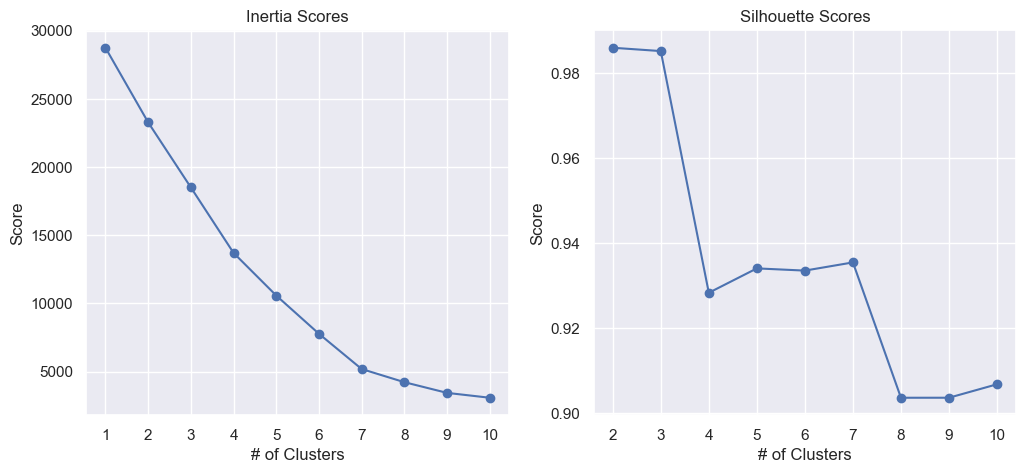

In [28]:
# Define X
X = df4[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

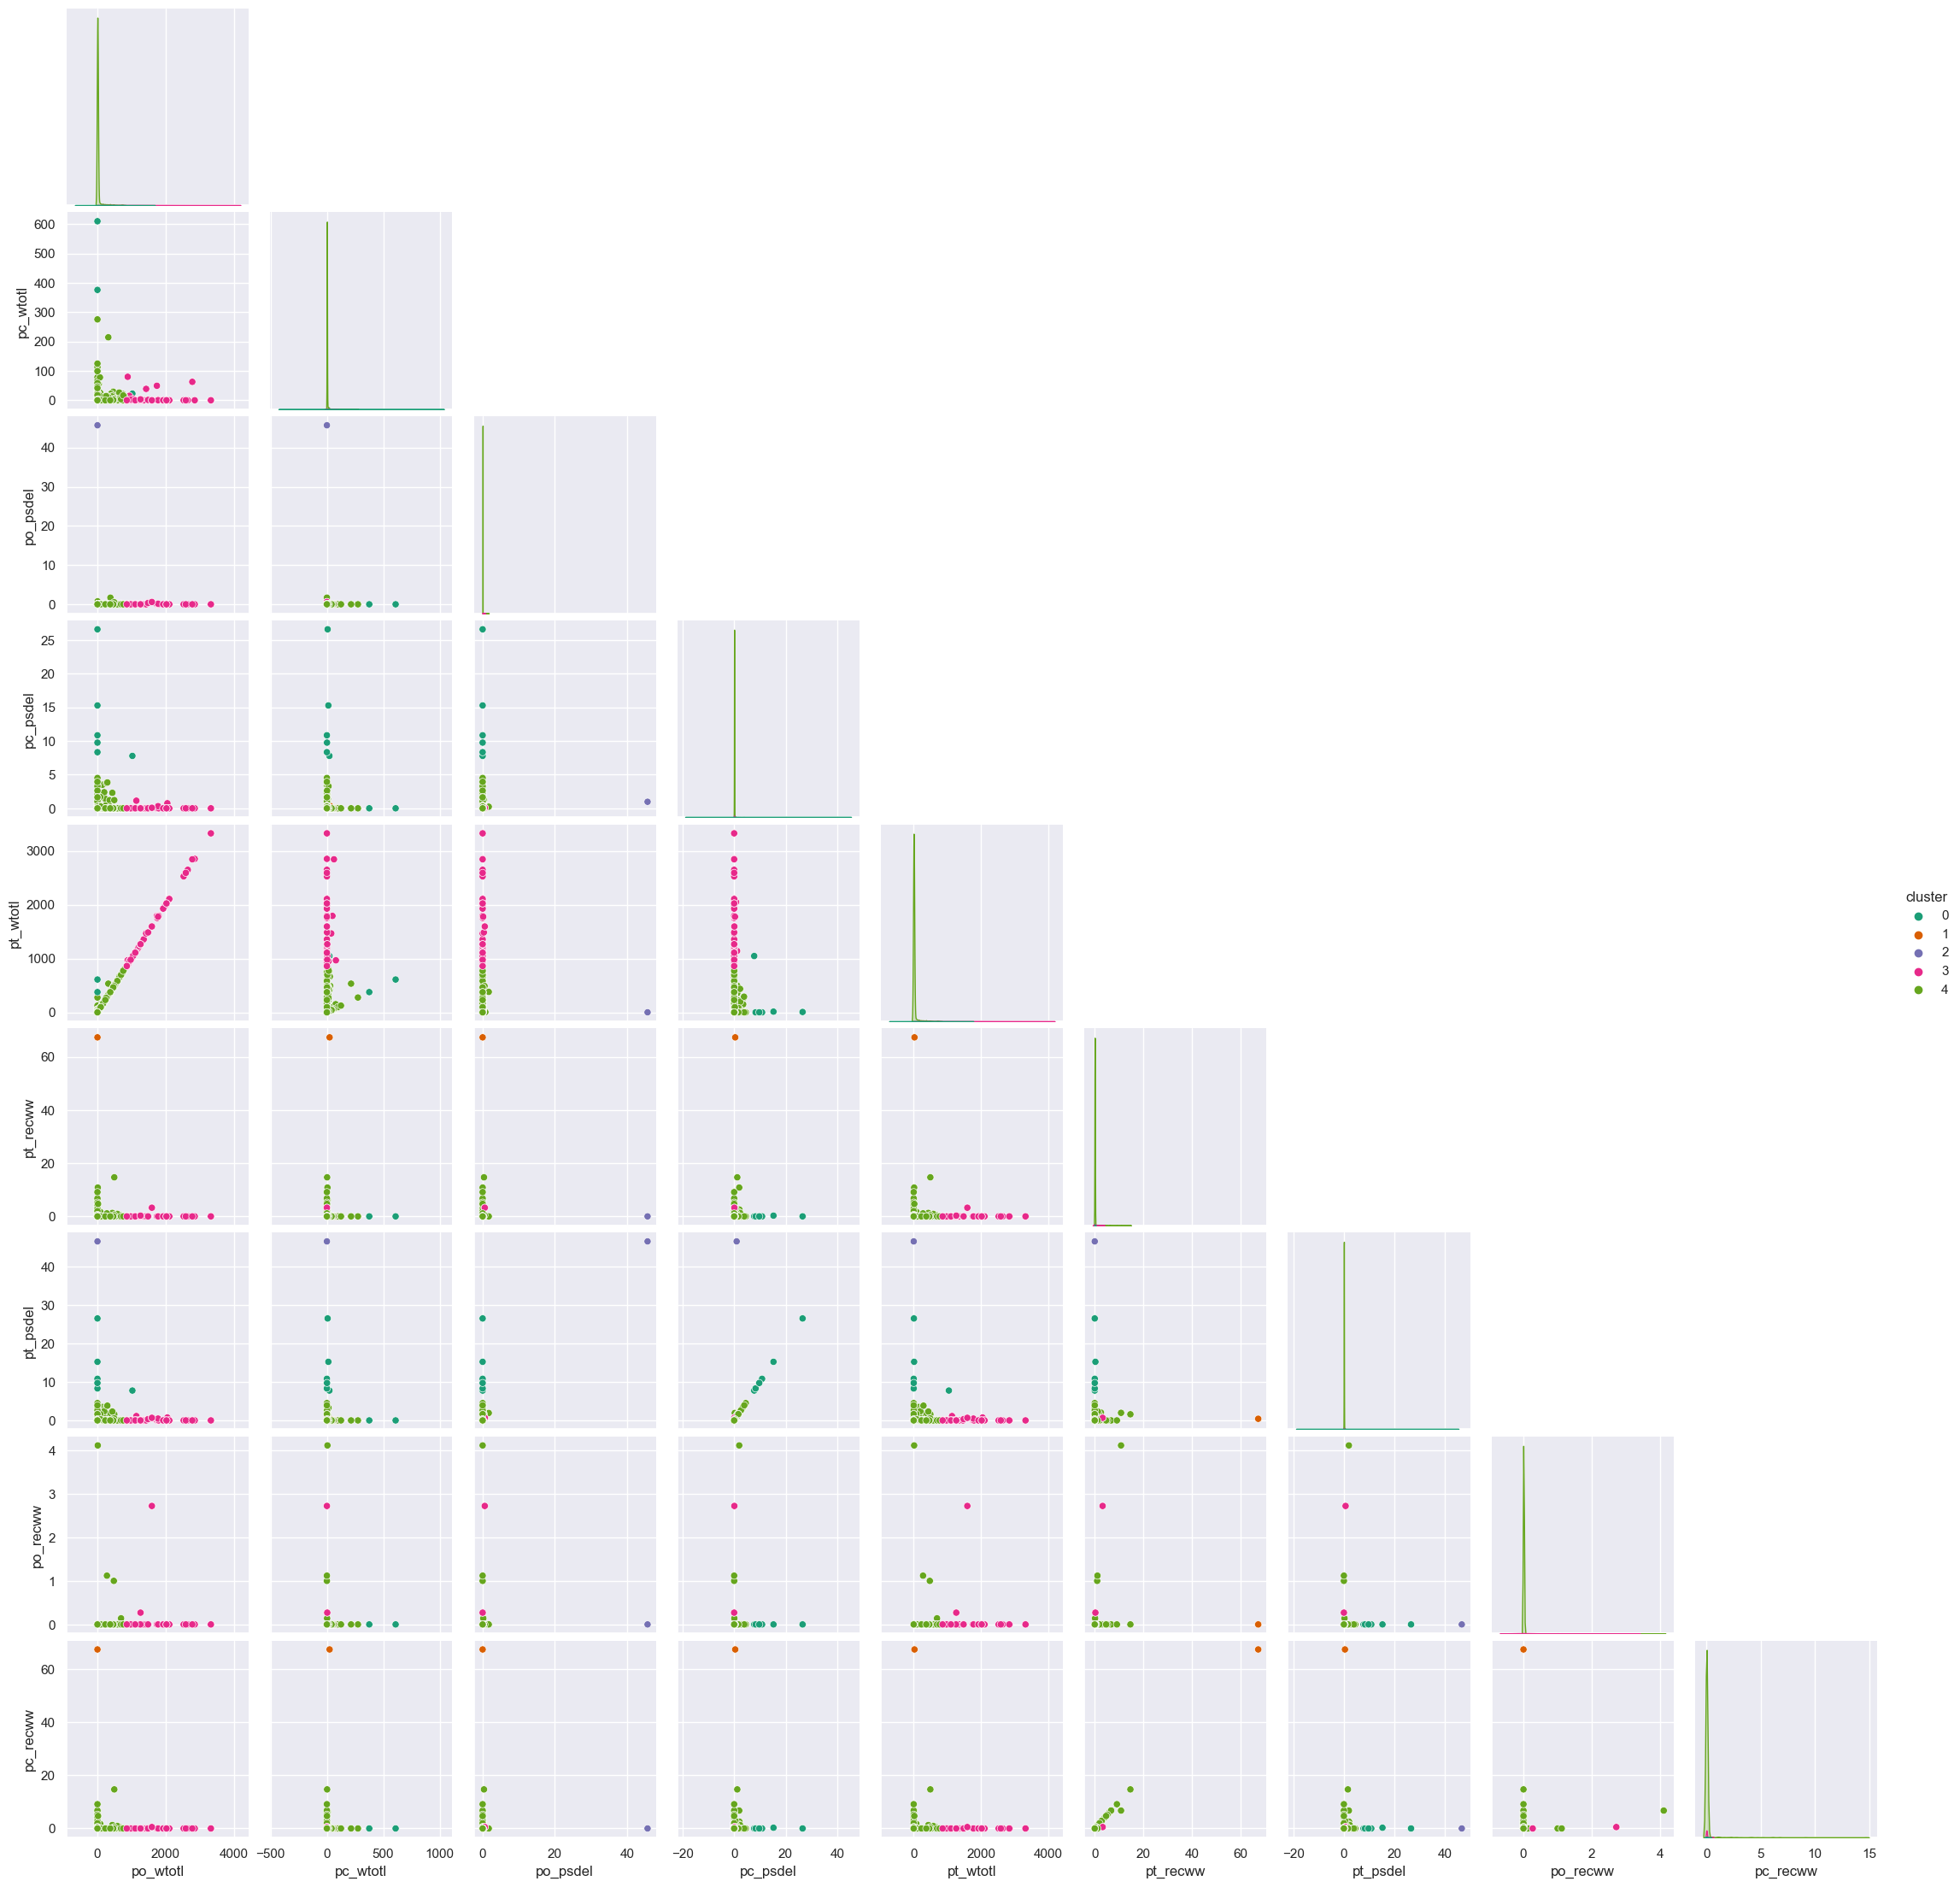

In [29]:
km4 = KMeans(n_clusters=5, n_init='auto', random_state=42)
km4.fit(Z)

df4['cluster'] = km4.labels_
df4.head()

sns.pairplot(data = df4,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

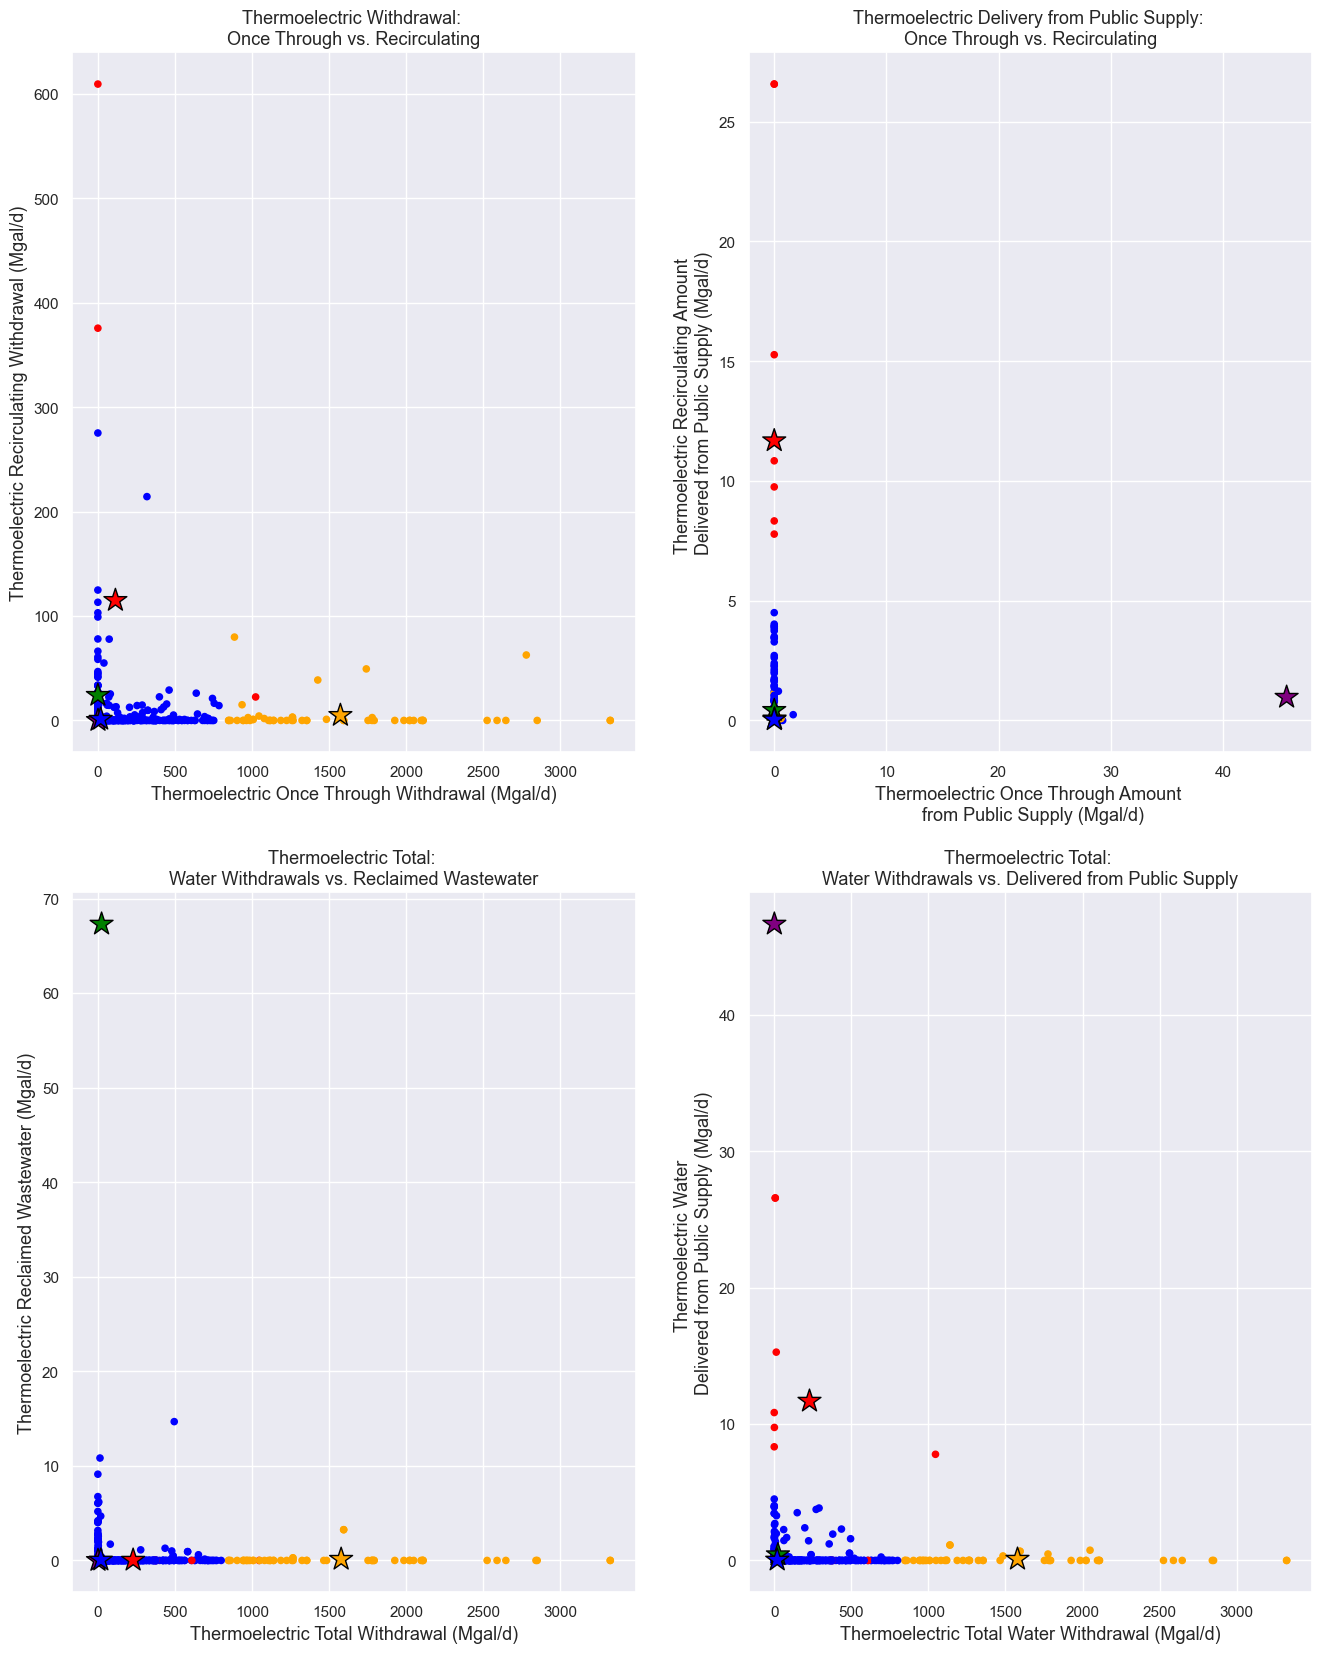

In [30]:
centroids = sc.inverse_transform(km4.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(2,2)
fg = (16,20)

colors = ["red", "green", 'purple', 'orange', 'blue']
df4['color'] = df4['cluster'].map(lambda p: colors[p])

# Plot points
df4.plot(
    kind="scatter",
    x="po_wtotl",
    y="pc_wtotl",
    figsize=fg,
    c=df4['color'],
    ax=ax[0,0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="po_wtotl",
    y="pc_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0,0]
)
# Labels
ax[0,0].set_title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=13);
ax[0,0].set_xlabel("Thermoelectric Once Through Withdrawal (Mgal/d)", fontsize=13)
ax[0,0].set_ylabel("Thermoelectric Recirculating Withdrawal (Mgal/d)", fontsize=13);



# Plot points
df4.plot(
    kind="scatter",
    x="po_psdel",
    y="pc_psdel",
    figsize=fg,
    c=df4['color'],
    ax=ax[0,1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="po_psdel",
    y="pc_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0,1]
)
# Labels
ax[0,1].set_title("Thermoelectric Delivery from Public Supply: \nOnce Through vs. Recirculating", fontsize=13)
ax[0,1].set_xlabel("Thermoelectric Once Through Amount \n from Public Supply (Mgal/d)", fontsize=13)
ax[0,1].set_ylabel("Thermoelectric Recirculating Amount \nDelivered from Public Supply (Mgal/d)", fontsize=13);




# Plot points
df4.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_recww",
    figsize=fg,
    c=df4['color'],
    ax=ax[1,0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_recww",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1,0]
)
# Labels
ax[1,0].set_title("Thermoelectric Total: \nWater Withdrawals vs. Reclaimed Wastewater", fontsize=13)
ax[1,0].set_xlabel("Thermoelectric Total Withdrawal (Mgal/d)", fontsize=13)
ax[1,0].set_ylabel("Thermoelectric Reclaimed Wastewater (Mgal/d)", fontsize=13);



# Plot points
df4.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_psdel",
    figsize=fg,
    c=df4['color'],
    ax=ax[1,1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="pt_wtotl",
    y="pt_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1,1]
)
# Labels
ax[1,1].set_title("Thermoelectric Total: \nWater Withdrawals vs. Delivered from Public Supply", fontsize=13)
ax[1,1].set_xlabel("Thermoelectric Total Water Withdrawal (Mgal/d)", fontsize=13)
ax[1,1].set_ylabel("Thermoelectric Water \nDelivered from Public Supply (Mgal/d)", fontsize=13);


# Show the plot
plt.show();

# Total Withdrawals vs. Public Supply

In [31]:
keep = ['to_wtotl', 'do_psdel', 
        'ps_wtotl']
df5 = df.filter(items=keep)
df5.head()

,to_wtotl,do_psdel,ps_wtotl
0,47.75,0.58,1.57
1,1.48,0.94,1.04
2,18.46,3.18,6.42
3,260.45,25.29,59.22
4,9.67,3.83,4.93


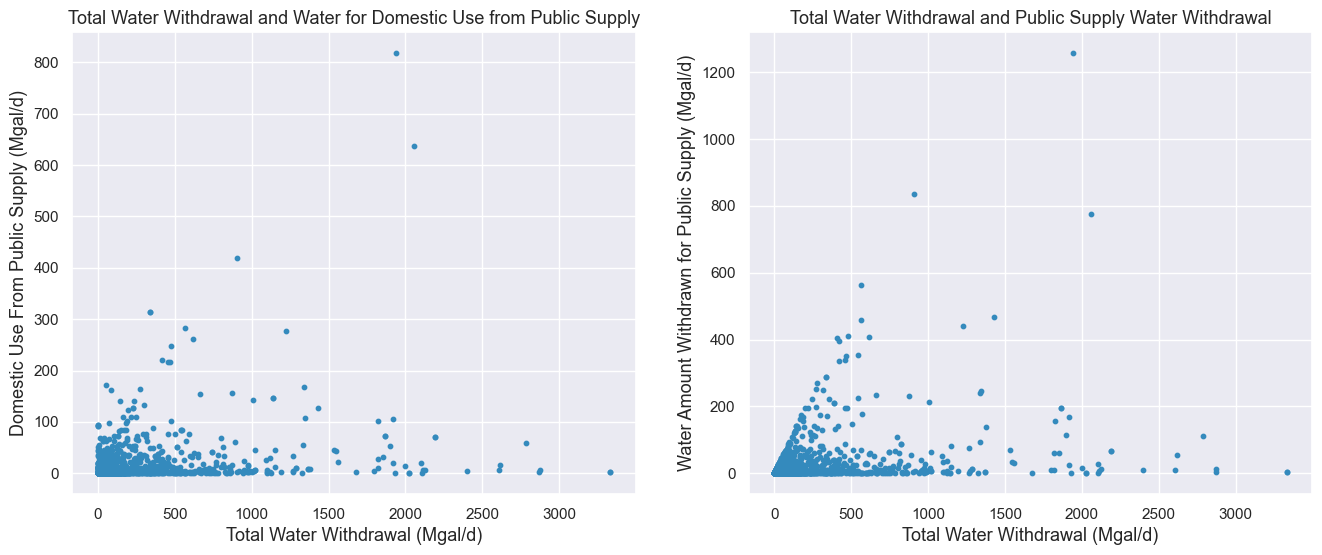

In [32]:
df5 = df.filter(items=keep)

fig, ax = plt.subplots(1,2)
f = 13
fg = (16,6)

df5.plot(kind="scatter", x="to_wtotl", y="do_psdel", figsize=fg, s=10, ax=ax[0])
ax[0].set_title("Total Water Withdrawal and Water for Domestic Use from Public Supply", fontsize=f);
ax[0].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[0].set_ylabel("Domestic Use From Public Supply (Mgal/d)", fontsize=f);

df5.plot(kind="scatter", x="to_wtotl", y="ps_wtotl", figsize=fg, s=10, ax=ax[1])
ax[1].set_title("Total Water Withdrawal and Public Supply Water Withdrawal", fontsize=f)
ax[1].set_xlabel("Total Water Withdrawal (Mgal/d)", fontsize=f)
ax[1].set_ylabel("Water Amount Withdrawn for Public Supply (Mgal/d)", fontsize=f);

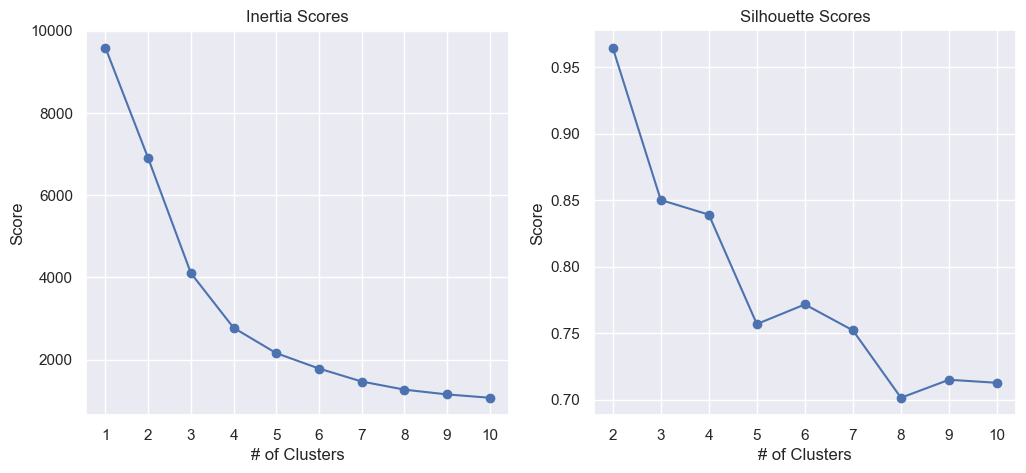

In [33]:
# Define X
X = df5[keep]

# Scale data
sc = StandardScaler()
Z = sc.fit_transform(X)

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    inertia_list.append(kmeans.inertia_)

sns.set(style="darkgrid")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))    

ax[0].plot(range(1, 11), inertia_list, marker='o')
ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel('# of Clusters')
ax[0].set_ylabel('Score')
ax[0].set_title('Inertia Scores');

silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(Z)
    silhouette_list.append(silhouette_score(Z, kmeans.labels_))

ax[1].plot(range(2, 11), silhouette_list, marker='o')
ax[1].set_xticks(range(2, 11))
ax[1].set_xlabel('# of Clusters')
ax[1].set_ylabel('Score')
ax[1].set_title('Silhouette Scores');

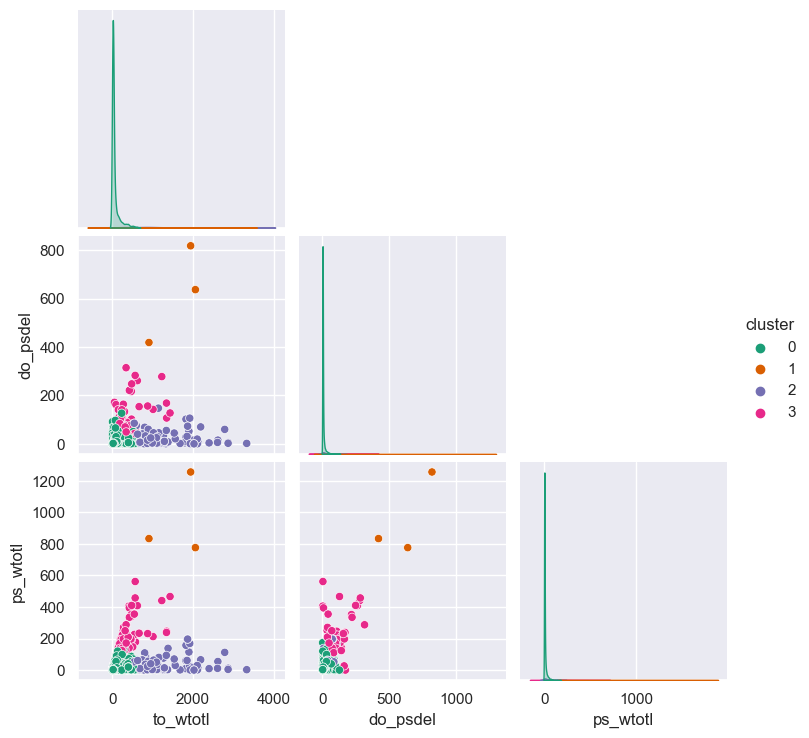

In [34]:
km5 = KMeans(n_clusters=4, n_init='auto', random_state=42)
km5.fit(Z)

df5['cluster'] = km5.labels_
df5.head()

sns.pairplot(data = df5,
             corner = True,
             palette = 'Dark2', #viridis 
             x_vars = keep,
             y_vars = keep,
             hue = 'cluster');

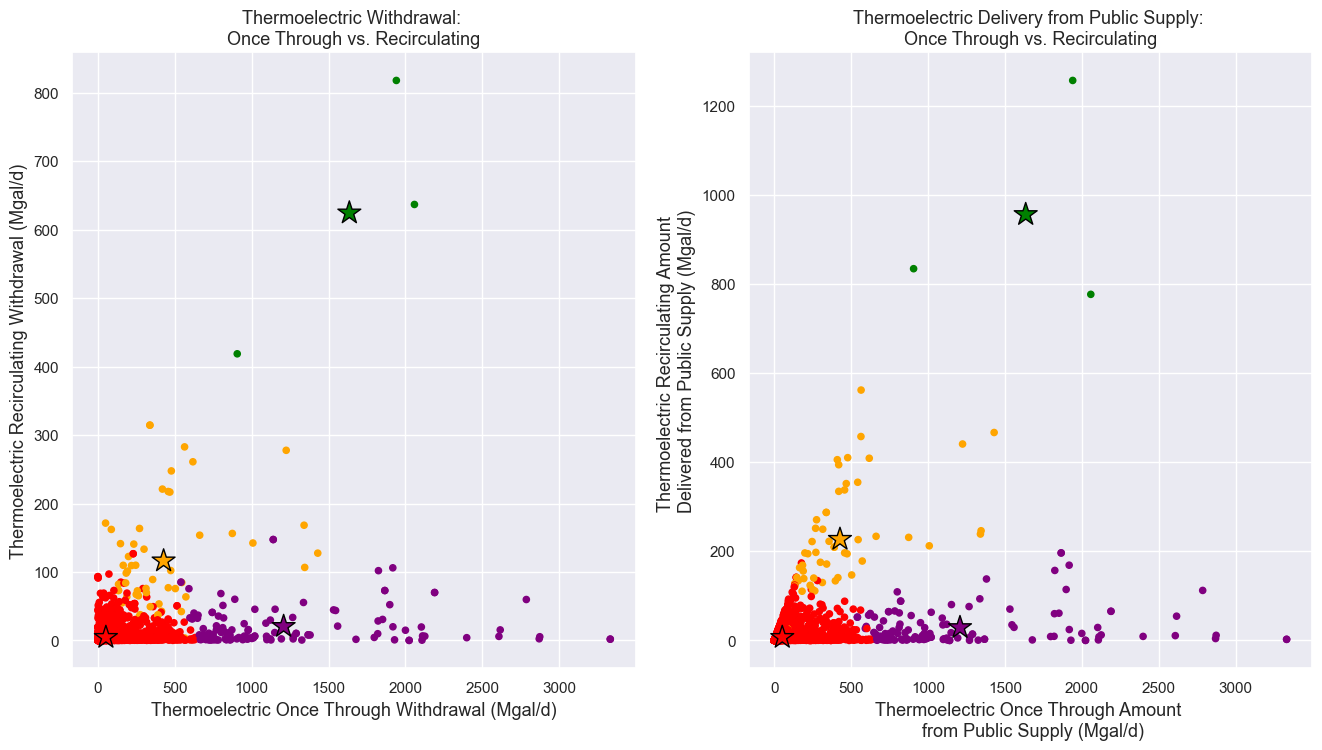

In [35]:
centroids = sc.inverse_transform(km5.cluster_centers_)
centroids = pd.DataFrame(
    centroids,
    columns=keep
)

fig, ax = plt.subplots(1,2)
fg = (16,8)

colors = ["red", "green", 'purple', 'orange']
df5['color'] = df5['cluster'].map(lambda p: colors[p])

# Plot points
df5.plot(
    kind="scatter",
    x="to_wtotl",
    y="do_psdel",
    figsize=fg,
    c=df5['color'],
    ax=ax[0]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="do_psdel",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[0]
)
# Labels
ax[0].set_title("Thermoelectric Withdrawal: \nOnce Through vs. Recirculating", fontsize=13);
ax[0].set_xlabel("Thermoelectric Once Through Withdrawal (Mgal/d)", fontsize=13)
ax[0].set_ylabel("Thermoelectric Recirculating Withdrawal (Mgal/d)", fontsize=13);



# Plot points
df5.plot(
    kind="scatter",
    x="to_wtotl",
    y="ps_wtotl",
    figsize=fg,
    c=df5['color'],
    ax=ax[1]
)
# Plot Centroids
centroids.plot(
    kind="scatter",
    x="to_wtotl",
    y="ps_wtotl",
    marker="*",
    c=colors,
    s=300,
    edgecolor = 'black',
    ax=ax[1]
)
# Labels
ax[1].set_title("Thermoelectric Delivery from Public Supply: \nOnce Through vs. Recirculating", fontsize=13)
ax[1].set_xlabel("Thermoelectric Once Through Amount \n from Public Supply (Mgal/d)", fontsize=13)
ax[1].set_ylabel("Thermoelectric Recirculating Amount \nDelivered from Public Supply (Mgal/d)", fontsize=13);

# Show the plot
plt.show();

In [ ]:
# BRYANS CODE STARTS HERE

# Create DataFrame
df1 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'fips', 'state'])
df1.head()

### Find the best K (Inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

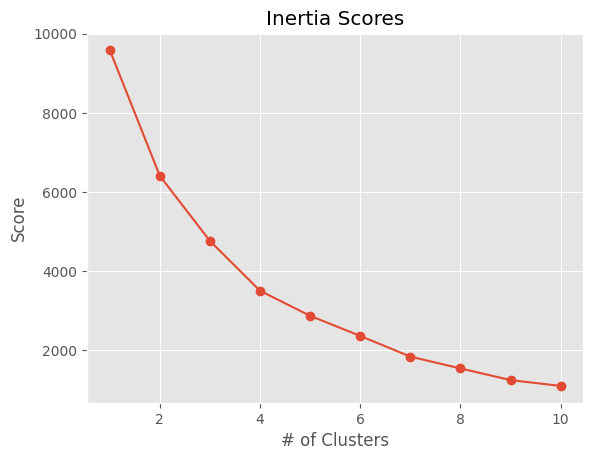

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Find the best K (Silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

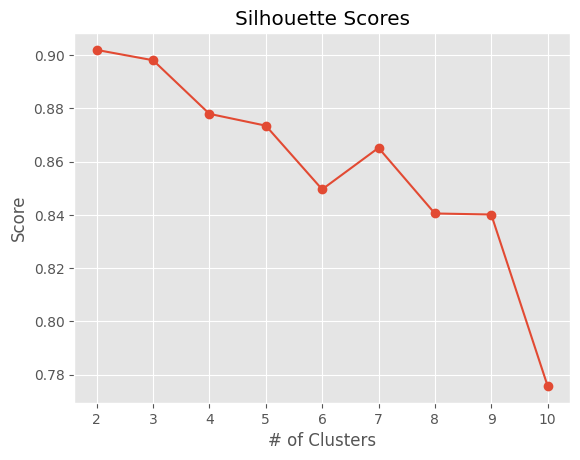

In [ ]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Cluster Predictions

In [ ]:
# Class attributes
km1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Predict
km1.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Attach predicted cluster to original points
df1['cluster'] = km1.labels_
df1.head()

,ps_gwpop,ps_swpop,ps_topop,fips,cluster
0,9.446,1.900,11.346,23029,0
1,10.497,0.000,10.497,13191,0
2,51.264,0.000,51.264,13179,0
3,78.563,671.826,750.389,9003,1
4,45.125,46.224,91.349,9013,0


### Centroids

In [ ]:
# Unscale to create centroids
centroids = sc.inverse_transform(km1.cluster_centers_)

### Visualize Cluster Labels

In [ ]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_gwpop', 'ps_swpop', 'ps_topop']
)
centroids

,ps_gwpop,ps_swpop,ps_topop
0,14.844218,18.884265,54.794173
1,257.325698,650.747604,1382.793469


<Figure size 1000x800 with 0 Axes>

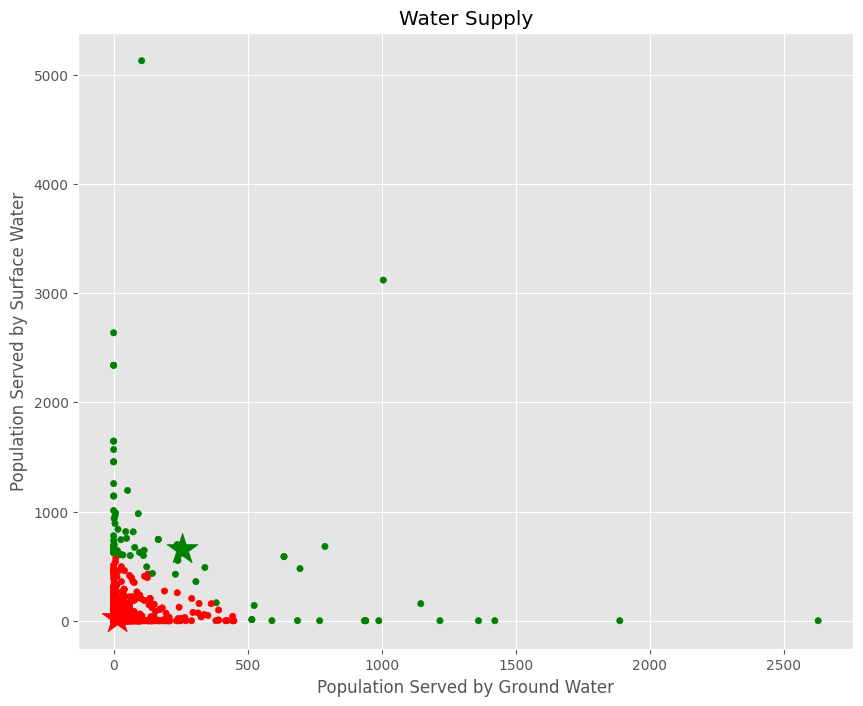

In [ ]:
# Create Scatterplot
# Figsize
plt.figure(figsize=(10, 8))

# Map colors for different clusters
colors = ["red", "green"]
df1['color'] = df1['cluster'].map(lambda p: colors[p])

# Plot points
ax = df1.plot(
    kind="scatter",
    x="ps_gwpop",
    y="ps_swpop",
    figsize=(10, 8),
    c=df1['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ps_gwpop",
    y="ps_swpop",
    marker="*",
    c=["r", "g"],
    s=550,
    ax=ax
)

# Labels
plt.title('Water Supply')
plt.xlabel('Population Served by Ground Water')
plt.ylabel('Population Served by Surface Water')

# Show the plot
plt.show();

# Water Supply

In [ ]:
# Create DataFrame
df2 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'fips'])
df2.head()

,ps_gwpop,ps_swpop,ps_topop,fips
0,9.446,1.900,11.346,23029
1,10.497,0.000,10.497,13191
2,51.264,0.000,51.264,13179
3,78.563,671.826,750.389,9003
4,45.125,46.224,91.349,9013


## DBSCAN

In [ ]:
# Create X and scale it
X = df2[['ps_gwpop', 'ps_swpop', 'ps_topop']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
e_vec = np.linspace(0.01, 0.7, 100)
n_vec = np.arange(1, 15)
res = []

for e in e_vec:
    for n in n_vec:
        cl = DBSCAN(eps=e, min_samples=n)
        cl.fit(Z)
        lbls = pd.Series(cl.labels_)
        if lbls.nunique() <= 1:
            continue

        sil = metrics.silhouette_score(Z, cl.labels_)
        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
df_res.sort_values('sil', ascending=False)

,e,n,sil
1337,0.672121,8,0.912940
1323,0.665152,8,0.912940
1365,0.686061,8,0.912940
1351,0.679091,8,0.912940
1379,0.693030,8,0.912940
...,...,...,...
5,0.010000,6,-0.200110
13,0.010000,14,-0.221790
4,0.010000,5,-0.235919
7,0.010000,8,-0.319369


0.9129399302688632

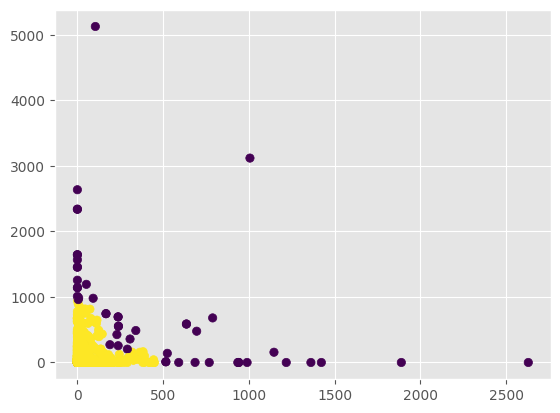

In [ ]:
# Instantiate DBSCAN and plot values
db = DBSCAN(eps=0.67, min_samples=8)
db.fit(Z)
plt.scatter(X.ps_gwpop, X.ps_swpop, c=db.labels_)
metrics.silhouette_score(Z, db.labels_)

# Water Consumption

In [ ]:
df3 = pd.DataFrame(df, columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl', 'fips'])
df3.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips
0,1.38,0.19,1.57,23029
1,1.04,0.00,1.04,13191
2,6.42,0.00,6.42,13179
3,12.78,46.44,59.22,9003
4,3.29,1.64,4.93,9013


## KMeans

In [ ]:
# Define X
X = df3[['ps_wgwto', 'ps_wswto', 'ps_wtotl']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km2 = KMeans(n_clusters=2, random_state=42)
km2.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Find the best K (Inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

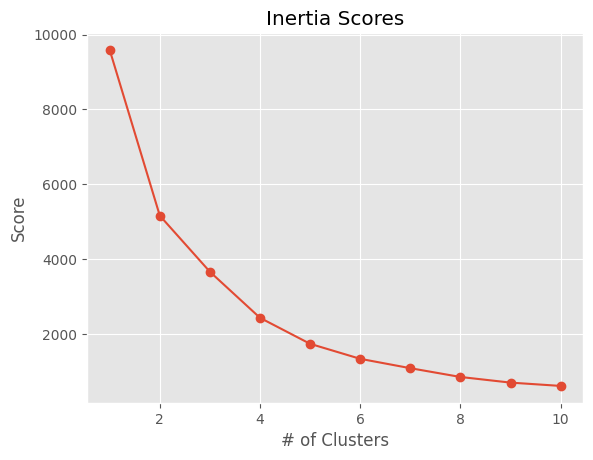

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Find the best K (Silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

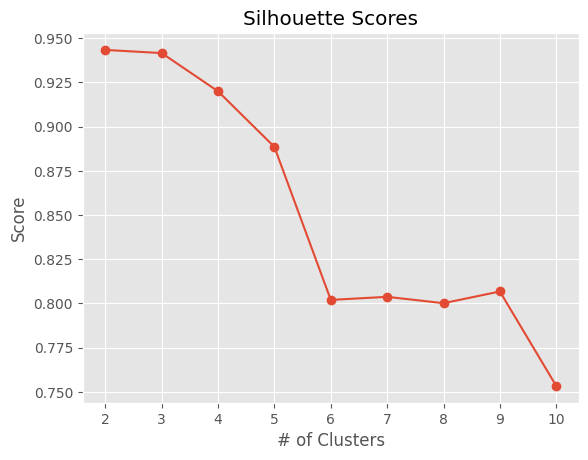

In [ ]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Cluster Predictions

In [ ]:
# Class attributes
km2.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Predict
km2.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Attach predicted cluster to original points
df3['cluster'] = km2.labels_
df3.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips,cluster
0,1.38,0.19,1.57,23029,0
1,1.04,0.00,1.04,13191,0
2,6.42,0.00,6.42,13179,0
3,12.78,46.44,59.22,9003,0
4,3.29,1.64,4.93,9013,0


### Centroids

In [ ]:
# Unscale to create centroids
centroids = sc.inverse_transform(km2.cluster_centers_)

### Visualize Cluster Labels

In [ ]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl']
)
centroids

,ps_wgwto,ps_wswto,ps_wtotl
0,3.374952,4.983171,8.358123
1,116.114524,206.481667,322.596190


<Figure size 1000x800 with 0 Axes>

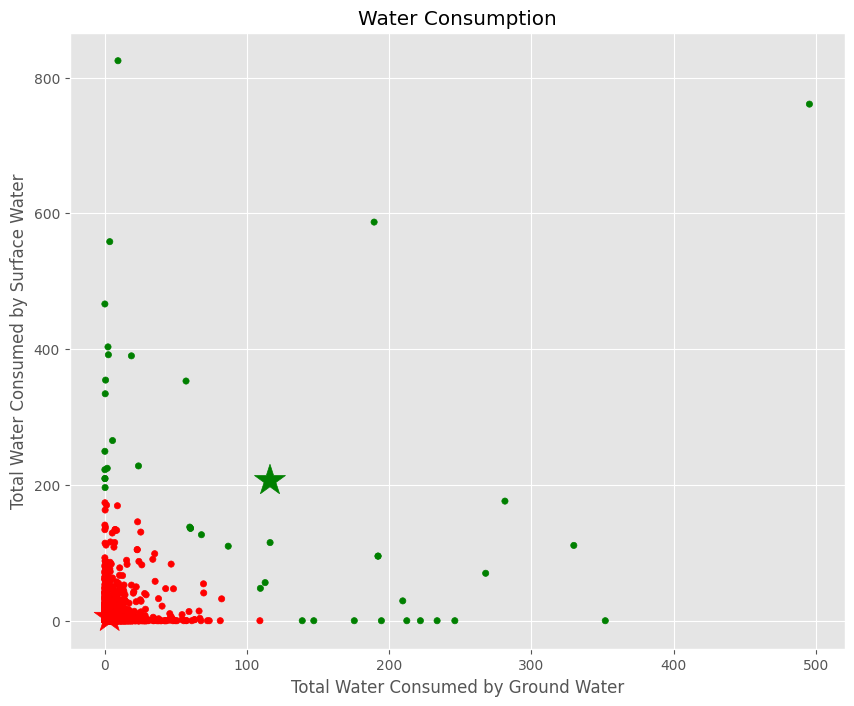

In [ ]:
# Create Scatterplot
# Figsize
plt.figure(figsize=(10, 8))

# Map colors for different clusters
colors = ["red", "green"]
df3['color'] = df3['cluster'].map(lambda p: colors[p])

# Plot points
ax = df3.plot(
    kind="scatter",
    x="ps_wgwto",
    y="ps_wswto",
    figsize=(10, 8),
    c=df3['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="ps_wgwto",
    y="ps_wswto",
    marker="*",
    c=["r", "g"],
    s=550,
    ax=ax
)

plt.title('Water Consumption')
plt.xlabel('Total Water Consumed by Ground Water')
plt.ylabel('Total Water Consumed by Surface Water')

# Show the plot
plt.show();

# Water Consumption

In [ ]:
# Create DataFrame
df4 = pd.DataFrame(df, columns=['ps_wgwto', 'ps_wswto', 'ps_wtotl', 'fips'])
df4.head()

,ps_wgwto,ps_wswto,ps_wtotl,fips
0,1.38,0.19,1.57,23029
1,1.04,0.00,1.04,13191
2,6.42,0.00,6.42,13179
3,12.78,46.44,59.22,9003
4,3.29,1.64,4.93,9013


## DBSCAN

In [ ]:
# Create X and scale it
X = df4[['ps_wgwto', 'ps_wswto', 'ps_wtotl']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
e_vec = np.linspace(0.01, 0.7, 100)
n_vec = np.arange(1, 15)
res = []

for e in e_vec:
    for n in n_vec:
        cl = DBSCAN(eps=e, min_samples=n)
        cl.fit(Z)
        lbls = pd.Series(cl.labels_)
        if lbls.nunique() <= 1:
            continue

        sil = metrics.silhouette_score(Z, cl.labels_)
        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
df_res.sort_values('sil', ascending=False)

,e,n,sil
1377,0.693030,6,0.934645
1363,0.686061,6,0.934645
1349,0.679091,6,0.934645
1391,0.700000,6,0.934645
1335,0.672121,6,0.933998
...,...,...,...
3,0.010000,4,-0.256052
8,0.010000,9,-0.270566
4,0.010000,5,-0.273657
7,0.010000,8,-0.278916


0.9346452548251363

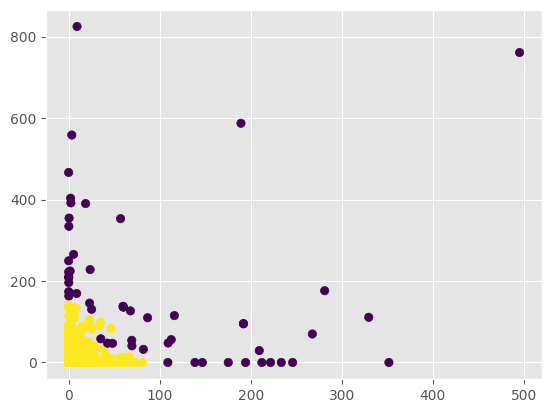

In [ ]:
# Instantiate DBSCAN and plot values
db2 = DBSCAN(eps=0.69, min_samples=6)
db2.fit(Z)
plt.scatter(X.ps_wgwto, X.ps_wswto, c=db2.labels_)
metrics.silhouette_score(Z, db2.labels_)

# Demographic and Economic Factors

In [ ]:
df5 = pd.DataFrame(df, columns=['population', 'median_household_income', 'fips'])
df5.head()

,population,median_household_income,fips
0,32191.0,38083.0,23029
1,14007.0,42988.0,13191
2,64427.0,42201.0,13179
3,896943.0,66395.0,9003
4,151948.0,79626.0,9013


## KMeans

In [ ]:
# Define X
X = df5[['population', 'median_household_income']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km3 = KMeans(n_clusters=2, random_state=42)
km3.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Find the best K (Inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

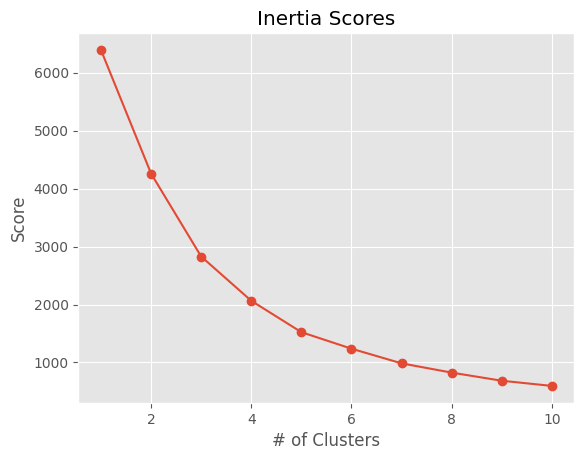

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Find the best K (Silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

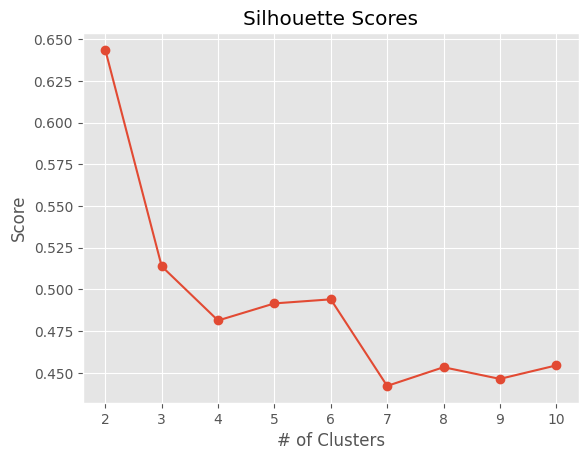

In [ ]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Cluster Predictions

In [ ]:
# Class attributes
km3.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Predict
km3.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Attach predicted cluster to original points
df5['cluster'] = km3.labels_
df5.head()

,population,median_household_income,fips,cluster
0,32191.0,38083.0,23029,0
1,14007.0,42988.0,13191,0
2,64427.0,42201.0,13179,0
3,896943.0,66395.0,9003,1
4,151948.0,79626.0,9013,1


### Centroids

In [ ]:
# Unscale to create centroids
centroids = sc.inverse_transform(km3.cluster_centers_)

### Visualize Cluster Labels

In [ ]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['population', 'median_household_income']
)
centroids

,population,median_household_income
0,48043.748483,44090.272228
1,552859.010811,69302.880654


<Figure size 1000x800 with 0 Axes>

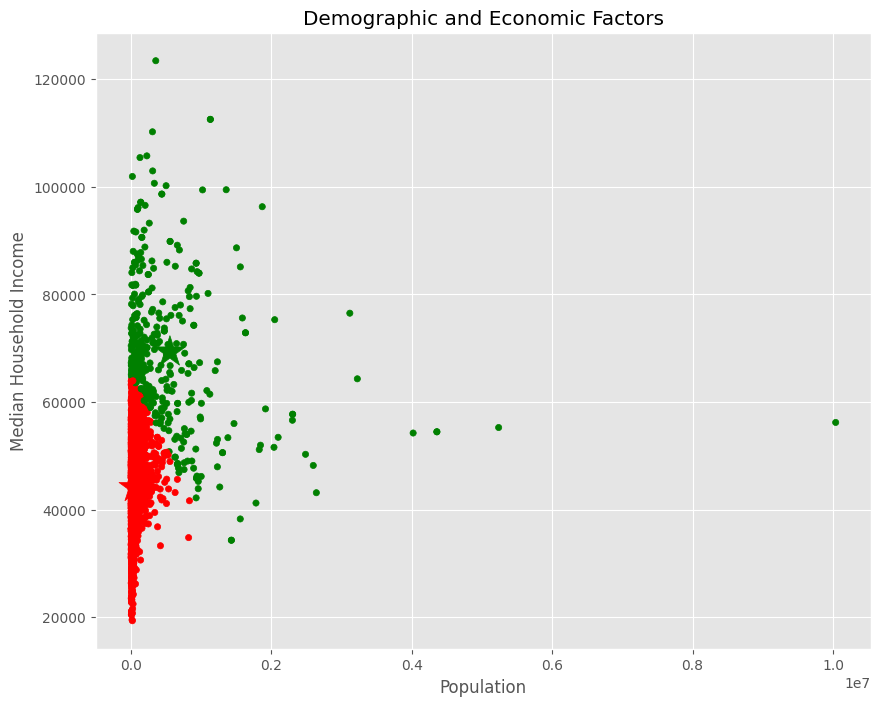

In [ ]:
# Create Scatterplot
# Figsize
plt.figure(figsize=(10, 8))

# Map colors for different clusters
colors = ["red", "green"]
df5['color'] = df5['cluster'].map(lambda p: colors[p])

# Plot points
ax = df5.plot(
    kind="scatter",
    x="population",
    y="median_household_income",
    figsize=(10, 8),
    c=df5['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="population",
    y="median_household_income",
    marker="*",
    c=["r", "g"],
    s=550,
    ax=ax
)

# Labels
plt.title('Demographic and Economic Factors')
plt.xlabel('Population')
plt.ylabel('Median Household Income')

# Show the plot
plt.show();

# Demographic and Economic Factors

In [ ]:
# Create DataFrame
df6 = pd.DataFrame(df, columns=['population', 'median_household_income', 'fips'])
df6.head()

,population,median_household_income,fips
0,32191.0,38083.0,23029
1,14007.0,42988.0,13191
2,64427.0,42201.0,13179
3,896943.0,66395.0,9003
4,151948.0,79626.0,9013


## DBSCAN

In [ ]:
# Create X and scale it
X = df6[['population', 'median_household_income']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
e_vec = np.linspace(0.01, 0.7, 100)
n_vec = np.arange(1, 15)
res = []

for e in e_vec:
    for n in n_vec:
        cl = DBSCAN(eps=e, min_samples=n)
        cl.fit(Z)
        lbls = pd.Series(cl.labels_)
        if lbls.nunique() <= 1:
            continue

        sil = metrics.silhouette_score(Z, cl.labels_)
        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
df_res.sort_values('sil', ascending=False)

,e,n,sil
1253,0.630303,8,0.817749
1281,0.644242,8,0.817749
1295,0.651212,8,0.817749
1267,0.637273,8,0.817749
1380,0.693030,9,0.816110
...,...,...,...
48,0.030909,7,-0.618019
6,0.010000,7,-0.634777
32,0.023939,5,-0.635111
7,0.010000,8,-0.675716


0.8177490921438012

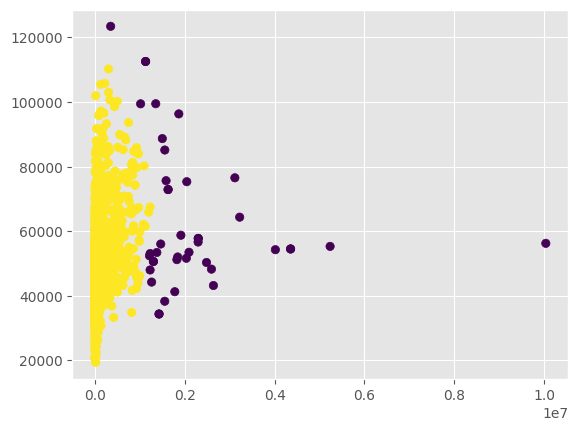

In [ ]:
# Instantiate DBSCAN and plot values
db3 = DBSCAN(eps=0.63, min_samples=8)
db3.fit(Z)
plt.scatter(X.population, X.median_household_income, c=db3.labels_)
metrics.silhouette_score(Z, db3.labels_)

# Climate Factors

In [ ]:
df7 = pd.DataFrame(df, columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df7.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179
3,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003
4,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013


## KMeans

In [ ]:
# Define X
X = df7[['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km4 = KMeans(n_clusters=2, random_state=42)
km4.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Find the best K (Inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

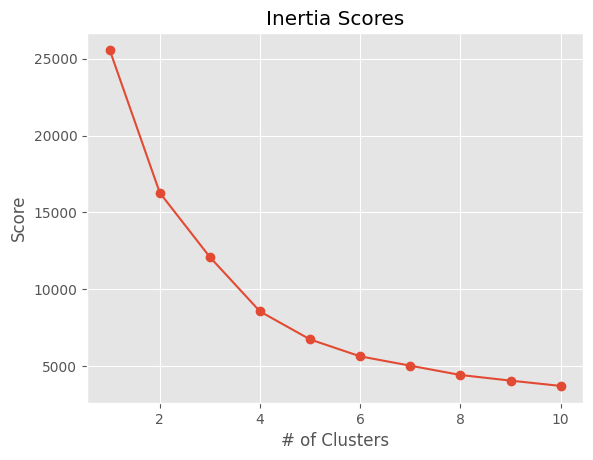

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Find the best K (Silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

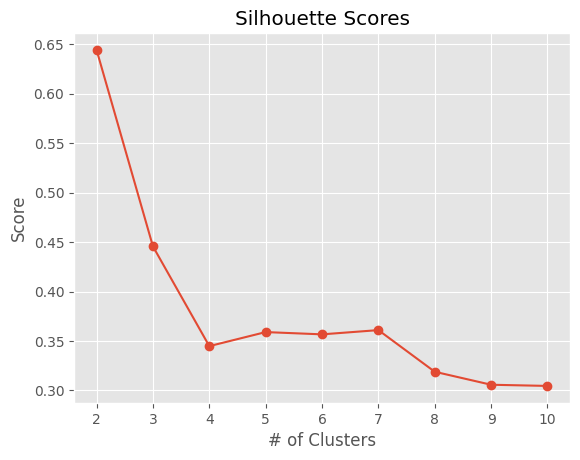

In [ ]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Cluster Predictions

In [ ]:
# Class attributes
km4.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Predict
km4.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Attach predicted cluster to original points
df7['cluster'] = km4.labels_
df7.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips,cluster
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029,0
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,0
2,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179,0
3,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003,0
4,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013,0


### Centroids

In [ ]:
# Unscale to create centroids
centroids = sc.inverse_transform(km4.cluster_centers_)

### Visualize Cluster Labels

In [ ]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']
)
centroids

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,13.728635,7.525187,70.837980,28.690653,9.558034,2.688455,0.692343,0.050650
1,13.192301,3.219469,9.455752,90.544248,81.898673,62.533097,39.721327,18.734867


<Figure size 1000x800 with 0 Axes>

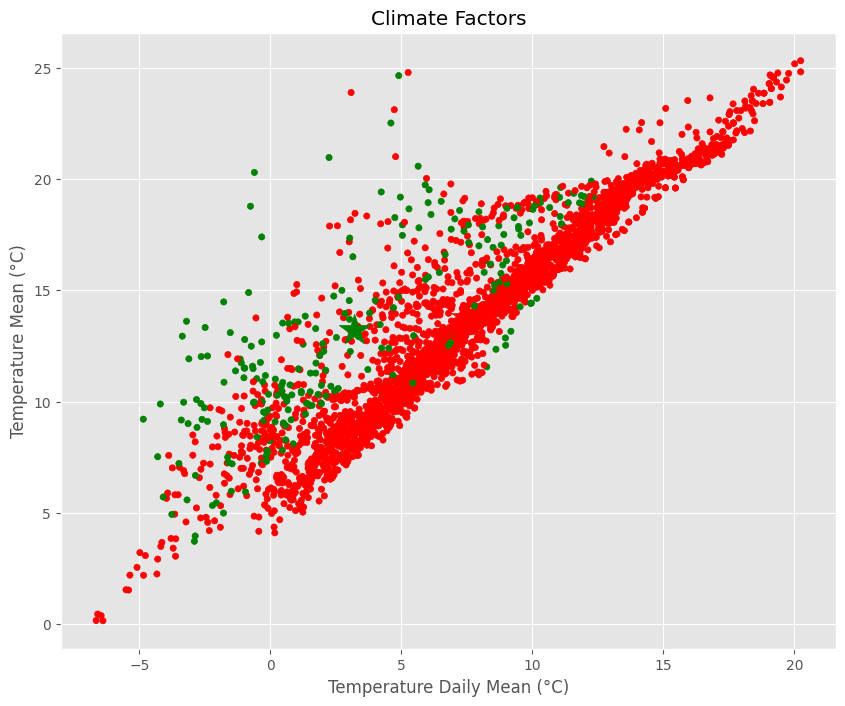

In [ ]:
# Create Scatterplot
# Figsize
plt.figure(figsize=(10, 8))

# Map colors for different clusters
colors = ["red", "green"]
df7['color'] = df7['cluster'].map(lambda p: colors[p])

# Plot points
ax = df7.plot(
    kind="scatter",
    x="tdmean_c",
    y="tmean_c",
    figsize=(10, 8),
    c=df7['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="tdmean_c",
    y="tmean_c",
    marker="*",
    c=["r", "g"],
    s=550,
    ax=ax
)

# Labels
plt.title('Climate Factors')
plt.xlabel('Temperature Daily Mean (°C)')
plt.ylabel('Temperature Mean (°C)')

# Show the plot
plt.show();

# Climate Factors

In [ ]:
# Create DataFrame
df8 = pd.DataFrame(df, columns=['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df8.head()

,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179
3,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003
4,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013


## DBSCAN

In [ ]:
# Create X and scale it
X = df8[['tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
e_vec = np.linspace(0.01, 0.7, 100)
n_vec = np.arange(1, 15)
res = []

for e in e_vec:
    for n in n_vec:
        cl = DBSCAN(eps=e, min_samples=n)
        cl.fit(Z)
        lbls = pd.Series(cl.labels_)
        if lbls.nunique() <= 1:
            continue

        sil = metrics.silhouette_score(Z, cl.labels_)
        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
df_res.sort_values('sil', ascending=False)

,e,n,sil
3,0.010000,4,0.348806
1302,0.679091,7,0.253620
1288,0.672121,7,0.253262
1330,0.693030,7,0.251349
1274,0.665152,7,0.250904
...,...,...,...
24,0.037879,2,-0.560240
17,0.030909,2,-0.580772
10,0.023939,2,-0.601500
1,0.010000,2,-0.603834


0.3488057711061301

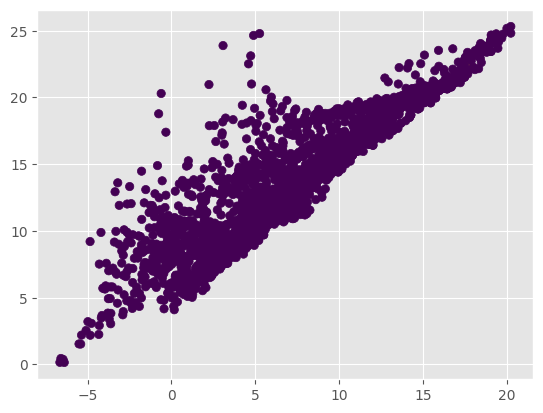

In [ ]:
# Instantiate DBSCAN and plot values
db4 = DBSCAN(eps=0.01, min_samples=4)
db4.fit(Z)
plt.scatter(X.tdmean_c, X.tmean_c, c=db4.labels_)
metrics.silhouette_score(Z, db4.labels_)

# Integrated Water and Socio-Economic Climate

In [ ]:
df9 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df9.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,9.446,1.900,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,10.497,0.000,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,51.264,0.000,51.264,6.42,0.00,6.42,64427.0,42201.0,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179
3,78.563,671.826,750.389,12.78,46.44,59.22,896943.0,66395.0,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003
4,45.125,46.224,91.349,3.29,1.64,4.93,151948.0,79626.0,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013


## KMeans

In [ ]:
# Define X
X = df9[['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]

# Scale data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Fit a K-means clustering model
km5 = KMeans(n_clusters=2, random_state=42)
km5.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

### Find the best K (Inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

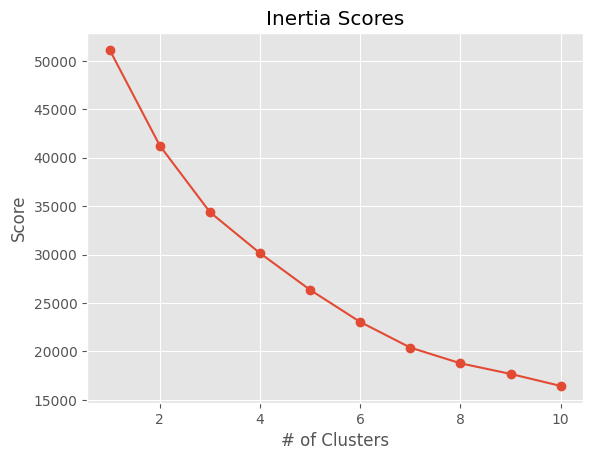

In [ ]:
inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

inertia_list

# Plot
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

### Find the best K (Silhouette)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

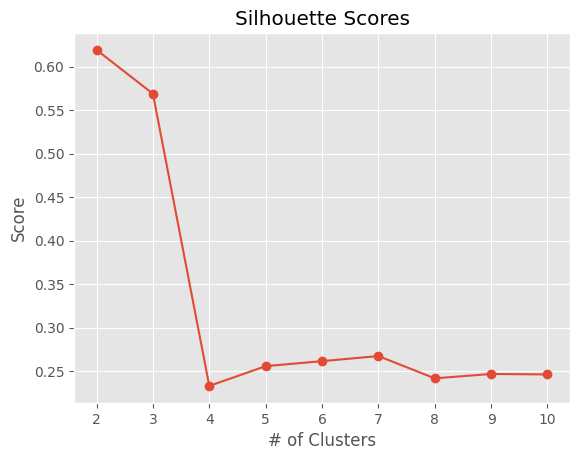

In [ ]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))
silhouette_list

# Plot
plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Cluster Predictions

In [ ]:
# Class attributes
km5.labels_

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Predict
km5.predict(X_scaled)

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
# Attach predicted cluster to original points
df9['cluster'] = km5.labels_
df9.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips,cluster
0,9.446,1.900,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029,0
1,10.497,0.000,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191,0
2,51.264,0.000,51.264,6.42,0.00,6.42,64427.0,42201.0,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179,0
3,78.563,671.826,750.389,12.78,46.44,59.22,896943.0,66395.0,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003,0
4,45.125,46.224,91.349,3.29,1.64,4.93,151948.0,79626.0,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013,0


### Centroids

In [ ]:
# Unscale to create centroids
centroids = sc.inverse_transform(km5.cluster_centers_)

### Visualize Cluster Labels

In [ ]:
# Create Centroid DataFrame
centroids = pd.DataFrame(
    centroids,
    columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']
)
centroids

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought
0,19.255657,34.404638,68.266993,3.208938,5.971993,9.180931,80384.525359,46759.056695,13.706084,7.491617,70.800185,28.727812,9.618129,2.815307,0.772033,0.071645
1,59.165496,82.473191,435.348739,26.103043,29.027043,55.130087,443082.456522,50233.969565,13.492435,3.727261,11.010652,88.989348,79.865609,59.856478,38.014913,18.139174


<Figure size 1000x800 with 0 Axes>

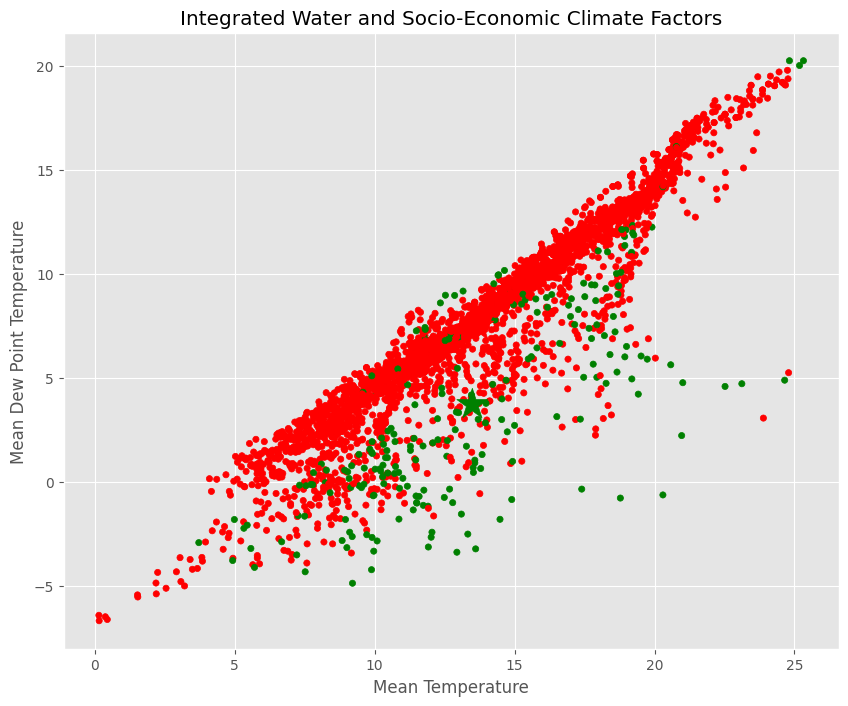

In [ ]:
# Create Scatterplot
# Figsize
plt.figure(figsize=(10, 8))

# Map colors for different clusters
colors = ["red", "green"]
df9['color'] = df9['cluster'].map(lambda p: colors[p])

# Plot points
ax = df9.plot(
    kind="scatter",
    x="tmean_c",
    y="tdmean_c",
    figsize=(10, 8),
    c=df9['color']
)

# Plot Centroids
centroids.plot(
    kind="scatter",
    x="tmean_c",
    y="tdmean_c",
    marker="*",
    c=["r", "g"],
    s=550,
    ax=ax
)

# Labels
plt.title('Integrated Water and Socio-Economic Climate Factors')
plt.xlabel('Mean Temperature')
plt.ylabel('Mean Dew Point Temperature')

# Show the plot
plt.show();

# Integrated Water and Socio-Economic Climate

In [ ]:
# Create DataFrame
df10 = pd.DataFrame(df, columns=['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought', 'fips'])
df10.head()

,ps_gwpop,ps_swpop,ps_topop,ps_wgwto,ps_wswto,ps_wtotl,population,median_household_income,tmean_c,tdmean_c,normal_wet,abnormally_dry,moderate_drought,severe_drought,extreme_drought,exceptional_drought,fips
0,9.446,1.900,11.346,1.38,0.19,1.57,32191.0,38083.0,6.65,2.39,86.78,13.22,0.00,0.0,0.0,0.0,23029
1,10.497,0.000,10.497,1.04,0.00,1.04,14007.0,42988.0,20.64,16.44,75.07,24.93,2.25,0.0,0.0,0.0,13191
2,51.264,0.000,51.264,6.42,0.00,6.42,64427.0,42201.0,20.14,15.37,84.02,15.98,0.21,0.0,0.0,0.0,13179
3,78.563,671.826,750.389,12.78,46.44,59.22,896943.0,66395.0,10.22,4.46,39.70,60.30,30.55,0.0,0.0,0.0,9003
4,45.125,46.224,91.349,3.29,1.64,4.93,151948.0,79626.0,9.85,4.09,40.99,59.01,29.40,0.0,0.0,0.0,9013


## DBSCAN

In [ ]:
# Create X and scale it
X = df10[['ps_gwpop', 'ps_swpop', 'ps_topop', 'ps_wgwto', 'ps_wswto', 'ps_wtotl', 'population', 'median_household_income', 'tmean_c', 'tdmean_c', 'normal_wet', 'abnormally_dry', 'moderate_drought', 'severe_drought', 'extreme_drought', 'exceptional_drought']]
Z = StandardScaler().fit_transform(X)

In [ ]:
# Brute force parameters (eps and n)
e_vec = np.linspace(0.01, 0.7, 100)
n_vec = np.arange(1, 15)
res = []

for e in e_vec:
    for n in n_vec:
        cl = DBSCAN(eps=e, min_samples=n)
        cl.fit(Z)
        lbls = pd.Series(cl.labels_)
        if lbls.nunique() <= 1:
            continue

        sil = metrics.silhouette_score(Z, cl.labels_)
        res.append((e, n, sil))

In [ ]:
# Create DataFrame of brute forced values
df_res = pd.DataFrame(res, columns=['e', 'n', 'sil'])
df_res.sort_values('sil', ascending=False)

,e,n,sil
1100,0.700000,13,0.252000
1086,0.693030,13,0.249232
1072,0.686061,13,0.246544
1058,0.679091,13,0.239597
1044,0.672121,13,0.238358
...,...,...,...
65,0.121515,2,-0.551469
93,0.163333,3,-0.552040
88,0.156364,3,-0.554065
83,0.149394,3,-0.558578


0.25199950049545117

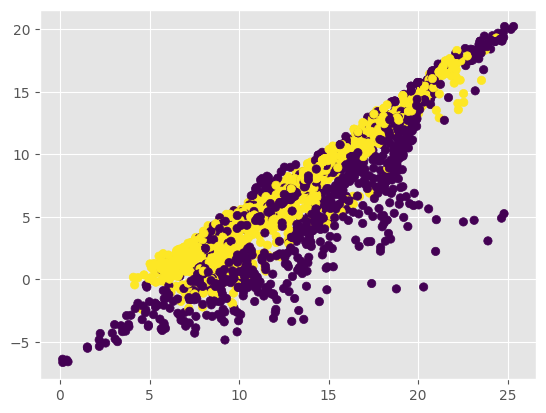

In [ ]:
# Instantiate DBSCAN and plot values
db5 = DBSCAN(eps=0.7, min_samples=13)
db5.fit(Z)
plt.scatter(X.tmean_c, X.tdmean_c, c=db5.labels_)
metrics.silhouette_score(Z, db5.labels_)